In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import hddm 
from patsy import dmatrix 
import numpy as np
from sys import platform
# print(hddm.__version__)

%matplotlib inline
# plt.rcParams['figure.figsize'] = 30, 10
sns.set_context("notebook", font_scale=10, rc={"lines.linewidth": 10, "lines.markersize": 30})

/home/krista/anaconda3/lib/python3.5/site-packages/IPython/parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


## Pre-processing

In [162]:
if platform == 'linux':
    home = '/home/krista/'
elif platform == 'darwin': 
#     home = '/Users/67981492/'
    home = '/Users/krista/'

In [163]:
!pwd
write_dir = home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/hddm_reg_models/'

/home/krista/Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/analysis_nbs


In [164]:
all_obs_data = hddm.load_csv(home + 'Dropbox/volatileValues/simple_rt_experiment_probabilityC/analysis/aggregated_data/combined_learning_sig_obs_data.csv')

In [9]:
all_obs_data.head(10)

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   
5  0.268538 -0.139394  0.139394   0  -1.000000   0.518539  761  0.302804   
6  0.035630 -0.027685  0.027685   0  -1.000000   0.768538  761  1.408409   
7  0.785155 -0.804363  0.804363   0  -1.000000   0.535630  761  0.571150   
8  0.352873  0.064818 -0.064818   0  -1.000000   1.285155  761  4.114561   
9  0.206726 -2.800194  2.800194   0  -0.935182   0.852873  761  0.822059   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   
5  0.275119  3.036967      ...                           5   
6  0.604046  0.000000      ...                           6   
7  0.635969  4.661588      ...                           7   
8  1.314367 -0.099227      ...                           8   
9  1.379872  4.103838      ...                           9   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   
5                    6                             5             6  0.305556   
6                    7                             6             7  0.305556   
7                    8                             7             8  0.305556   
8                    9                             8             9  0.305556   
9                   10                             9            10  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  
5              36            111              111        111              1  
6              36            111              112        111              1  
7              36            111              111        111              1  
8              36            111              111        111              1  
9              36            111              111        112              0  

[10 rows x 44 columns]

In [165]:
all_obs_data.columns = all_obs_data.columns.str.strip()
all_obs_data.head()

cpp  target_B  choice_B  cp  gen_drift  gen_bound   ID      b_t0  \
0  0.099471  0.000000  0.000000   1   0.013572   0.416406  761  0.000000   
1  0.035079  0.000000  0.000000   0   0.013572   0.599471  761  1.390214   
2  0.023075 -1.241007  1.241007   0   0.013572   0.535079  761  0.792372   
3  0.019881 -0.595781  0.595781   0  -1.000000   0.523075  761  0.532802   
4  0.018539 -0.306135  0.306135   0  -1.000000   0.519881  761  0.391376   

       b_t1      r_t1      ...        epoch_trial_zero_idx  \
0  0.000000  2.528877      ...                           0   
1  0.149207  0.000000      ...                           1   
2  0.196591  0.000000      ...                           2   
3  0.226667  0.000000      ...                           3   
4  0.251982  0.000000      ...                           4   

   epoch_trial_one_idx  shifted_epoch_trial_zero_idx  repeat_trial  prop_112  \
0                    1                             0             1  0.305556   
1                    2                             1             2  0.305556   
2                    3                             2             3  0.305556   
3                    4                             3             4  0.305556   
4                    5                             4             5  0.305556   

   n_epoch_trials  p_id_solution  obs_low_val_cue  id_choice  p_id_accuracy  
0              36            111              111        111              1  
1              36            111              112        112              0  
2              36            111              112        111              1  
3              36            111              112        112              0  
4              36            111              112        111              1  

[5 rows x 44 columns]

In [166]:
all_obs_data.columns

Index(['cpp', 'target_B', 'choice_B', 'cp', 'gen_drift', 'gen_bound', 'ID',
       'b_t0', 'b_t1', 'r_t1', 'r_t2', 'obs_cp', 'ideal_B', 'B_ideal_target',
       'B_nonideal_target', 'LR_choice', 'obs_LR_accuracy', 'obs_LR_solution',
       'reward', 'cumulative_reward', 'rt', 'total_trial_time', 'iti',
       'cp_with_slow_fast', 'obs_cp_with_slow_fast', 'obs_high_val_cue',
       'ID.1', 'condition', 'coded_condition', 'original_trial', 'epoch_n',
       'epoch_trial', 'shifted_epoch_trial', 'max_epoch_n',
       'epoch_trial_zero_idx', 'epoch_trial_one_idx',
       'shifted_epoch_trial_zero_idx', 'repeat_trial', 'prop_112',
       'n_epoch_trials', 'p_id_solution', 'obs_low_val_cue', 'id_choice',
       'p_id_accuracy'],
      dtype='object')

In [167]:
np.unique(all_obs_data.id_choice)

array([111, 112])

In [168]:
all_obs_data.loc[all_obs_data.id_choice == 111, 'id_choice'] = 0
all_obs_data.loc[all_obs_data.id_choice == 112, 'id_choice'] = 1

In [169]:
all_obs_data.loc[all_obs_data.p_id_solution == 111, 'p_id_solution'] = 0
all_obs_data.loc[all_obs_data.p_id_solution == 112, 'p_id_solution'] = 1

In [170]:
np.sum(((all_obs_data.id_choice == all_obs_data.p_id_solution) == 
all_obs_data.p_id_accuracy))

57600

In [171]:
all_obs_data_sample_lc = all_obs_data[(all_obs_data.condition == 'lc') & (all_obs_data.ID == 761)] 

In [172]:
all_obs_data = all_obs_data.rename(index=str, columns={"p_id_accuracy": "response", 
                                                        "ID": "subj_idx"})
all_obs_data = all_obs_data[['response','rt', 'condition', 'subj_idx', 'ideal_B', 'cpp']] 
all_obs_data = all_obs_data.rename(index=str, columns={'ideal_B': 'B'})

In [173]:
all_obs_data['condition'] = all_obs_data['condition'].str.strip()
all_obs_data.head()

response        rt condition  subj_idx         B       cpp
0         1  0.711570        hc       761  0.000000  0.099471
1         0  0.681410        hc       761 -1.241007  0.035079
2         1  0.767118        hc       761 -0.595781  0.023075
3         0  0.507209        hc       761 -0.306135  0.019881
4         1  0.656259        hc       761 -0.139394  0.018539

In [27]:
n_subjects = len(np.unique(all_obs_data.subj_idx))
n_conditions = len(np.unique(all_obs_data.condition))

print(n_subjects, n_conditions)

24 4


In [21]:
all_obs_data.columns

Index(['response', 'rt', 'condition', 'subj_idx', 'B', 'cpp'], dtype='object')

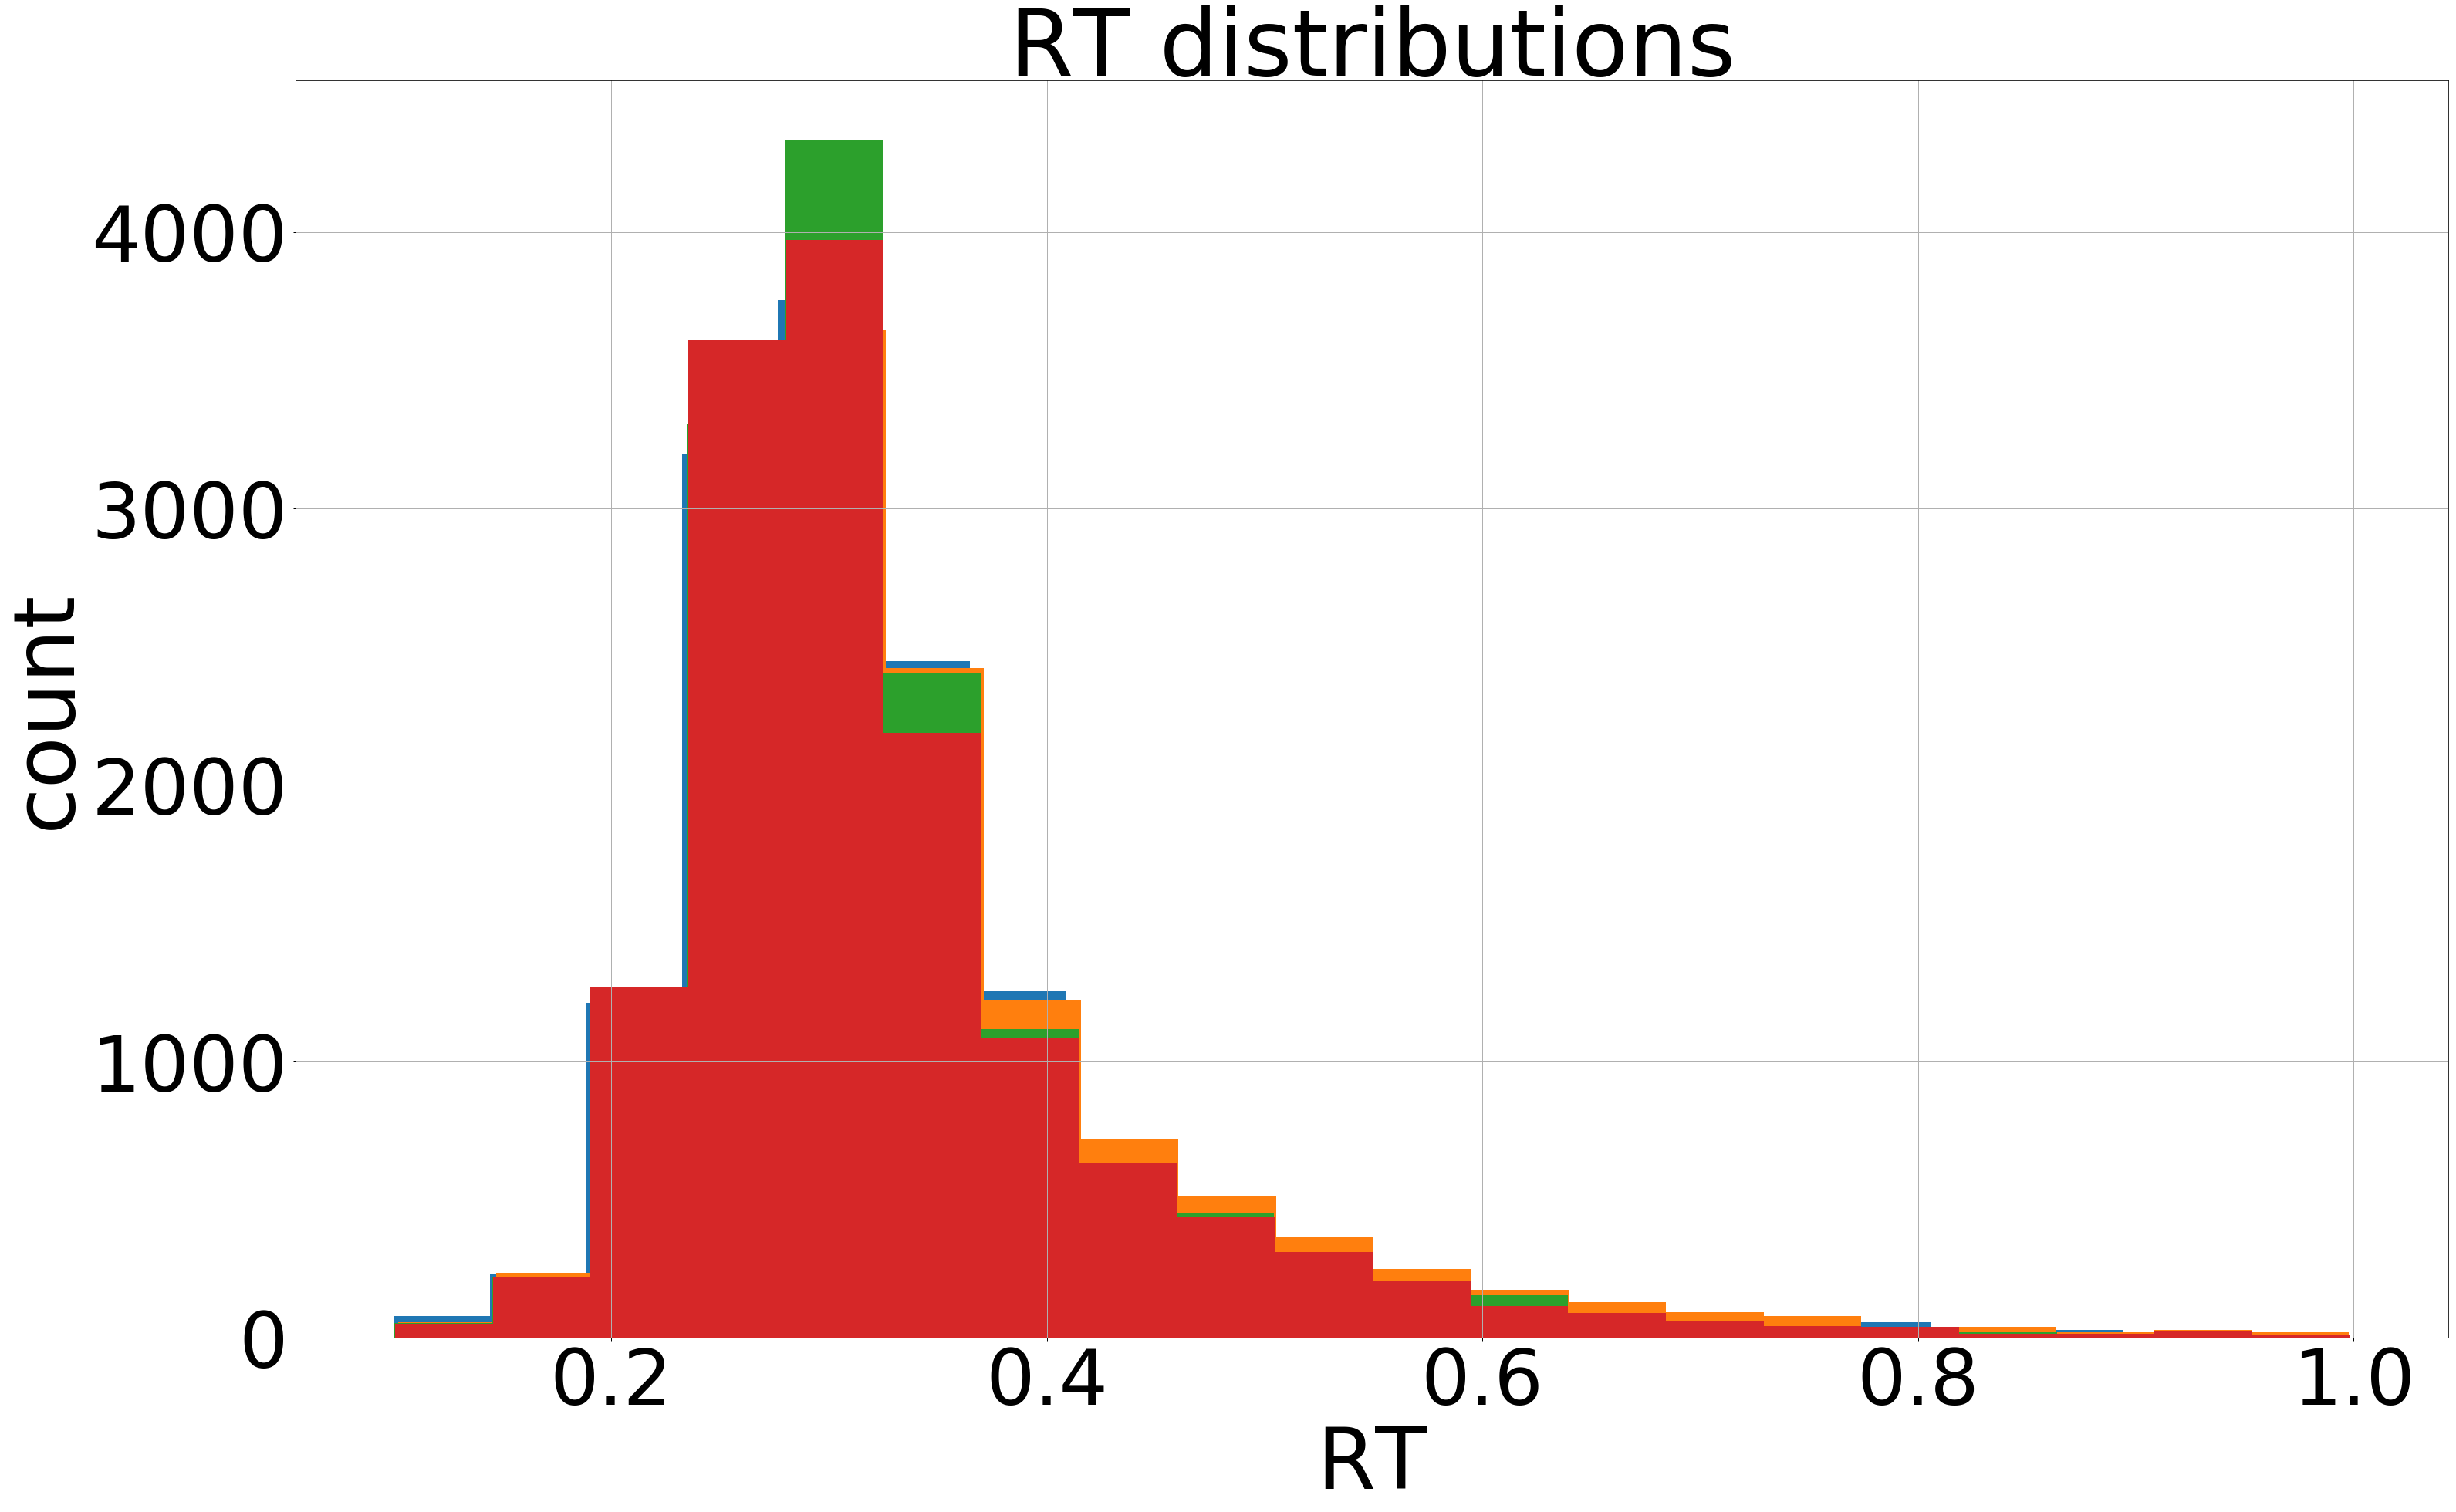

In [22]:
fig=plt.figure(figsize=(50,30))
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in all_obs_data.groupby('condition'):
    subj_data.rt.hist(bins=20, histtype='stepfilled', ax=ax)

In [24]:
n_samples, n_burned_samples = 1000,50
n_samples_test, n_burned_samples_test, n_thin_test = 10, 2, 2

In [23]:
all_obs_data.head()

response        rt condition  subj_idx         B       cpp
0         1  0.711570        hc       761  0.000000  0.099471
1         0  0.681410        hc       761 -1.241007  0.035079
2         1  0.767118        hc       761 -0.595781  0.023075
3         0  0.507209        hc       761 -0.306135  0.019881
4         1  0.656259        hc       761 -0.139394  0.018539

In [176]:
#get increments 
start = 100
stop = 700 
increment = 100
n_trials = np.arange(start, stop, increment)
print(n_trials)

#could randomize the selection of trials while preserving temporal sequence (not always beginning from trial 0)
#but this is how the data would exist if there were only n trials.
t100 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[0])
t200 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[1])
t300 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[2])
t400 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[3])
t500 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[4])
t600 = all_obs_data.groupby(['subj_idx', 'condition']).head(n_trials[5])

[100 200 300 400 500 600]


In [33]:
model =['t ~ cpp:C(condition)', 'v ~ B:C(condition)']
print(t100.shape[0] == n_subjects*n_conditions*100, t300.shape[0] == n_subjects*n_conditions*300)

True True


In [87]:
t_cpp_v_B_obs_reg_t100 = hddm.HDDMRegressor(t100,reg_model,bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t100.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t100.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2143.4 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [88]:
t_cpp_v_B_obs_reg_t200 = hddm.HDDMRegressor(t200,reg_model,  bias=True,group_only_regressors=True )
t_cpp_v_B_obs_reg_t200.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t200.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 2687.4 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [89]:
t_cpp_v_B_obs_reg_t300 = hddm.HDDMRegressor(t300,reg_model, bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t300.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t300.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 3246.5 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [90]:
t_cpp_v_B_obs_reg_t400 = hddm.HDDMRegressor(t400,reg_model, bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t400.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t400.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 4157.1 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [91]:
t_cpp_v_B_obs_reg_t500 = hddm.HDDMRegressor(t500,reg_model, bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t500.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t500.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 4711.7 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [92]:
t_cpp_v_B_obs_reg_t600 = hddm.HDDMRegressor(t600,reg_model, bias=True, group_only_regressors=True )
t_cpp_v_B_obs_reg_t600.sample(n_samples,burn=n_burned_samples,  dbname='t_cpp_v_B_obs_reg_t600.db', db='pickle')

Adding these covariates:
['t_Intercept', 't_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]']
Adding these covariates:
['v_Intercept', 'v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]']


/home/krista/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']


 [-----------------100%-----------------] 1001 of 1000 complete in 5319.2 sec

/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:224: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return reshape(newshape, order=order)
/home/krista/anaconda3/lib/python3.5/site-packages/numpy

In [95]:
# #send text when the script is done
# from twilio.rest import Client
# accountSid = 'AC2832bdf83bb5a2f150686d323b7a3440'
# authToken = '70363f4f104ac88b8aefc6b7886fb989'
# twilioClient = Client(accountSid, authToken)
# myTwilioNumber = 6095422252
# destCellPhone = 6094242780
# myMessage = twilioClient.messages.create(body = "sensitivity analysis is done for observed data.",  from_=myTwilioNumber, to=destCellPhone)

In [121]:
#save
t_cpp_v_B_obs_reg_t100.save('t_cpp_v_B_obs_reg_t100')
t_cpp_v_B_obs_reg_t200.save('t_cpp_v_B_obs_reg_t200')
t_cpp_v_B_obs_reg_t300.save('t_cpp_v_B_obs_reg_t300')
t_cpp_v_B_obs_reg_t400.save('t_cpp_v_B_obs_reg_t400')
t_cpp_v_B_obs_reg_t500.save('t_cpp_v_B_obs_reg_t500')
t_cpp_v_B_obs_reg_t600.save('t_cpp_v_B_obs_reg_t600')

In [3]:
#load 
t_cpp_v_B_obs_reg_t100=hddm.load('t_cpp_v_B_obs_reg_t100')
t_cpp_v_B_obs_reg_t200=hddm.load('t_cpp_v_B_obs_reg_t200')
t_cpp_v_B_obs_reg_t300=hddm.load('t_cpp_v_B_obs_reg_t300')
t_cpp_v_B_obs_reg_t400=hddm.load('t_cpp_v_B_obs_reg_t400')
t_cpp_v_B_obs_reg_t500=hddm.load('t_cpp_v_B_obs_reg_t500')
t_cpp_v_B_obs_reg_t600=hddm.load('t_cpp_v_B_obs_reg_t600')

# Plot model fits

In [34]:
dics = [t_cpp_v_B_obs_reg_t100.dic, t_cpp_v_B_obs_reg_t200.dic, t_cpp_v_B_obs_reg_t300.dic,
       t_cpp_v_B_obs_reg_t400.dic, t_cpp_v_B_obs_reg_t500.dic, t_cpp_v_B_obs_reg_t600.dic]
m_names = ['100t', '200t', '300t', '400t', '500t', '600t']

Text(0,0.5,'DIC score')

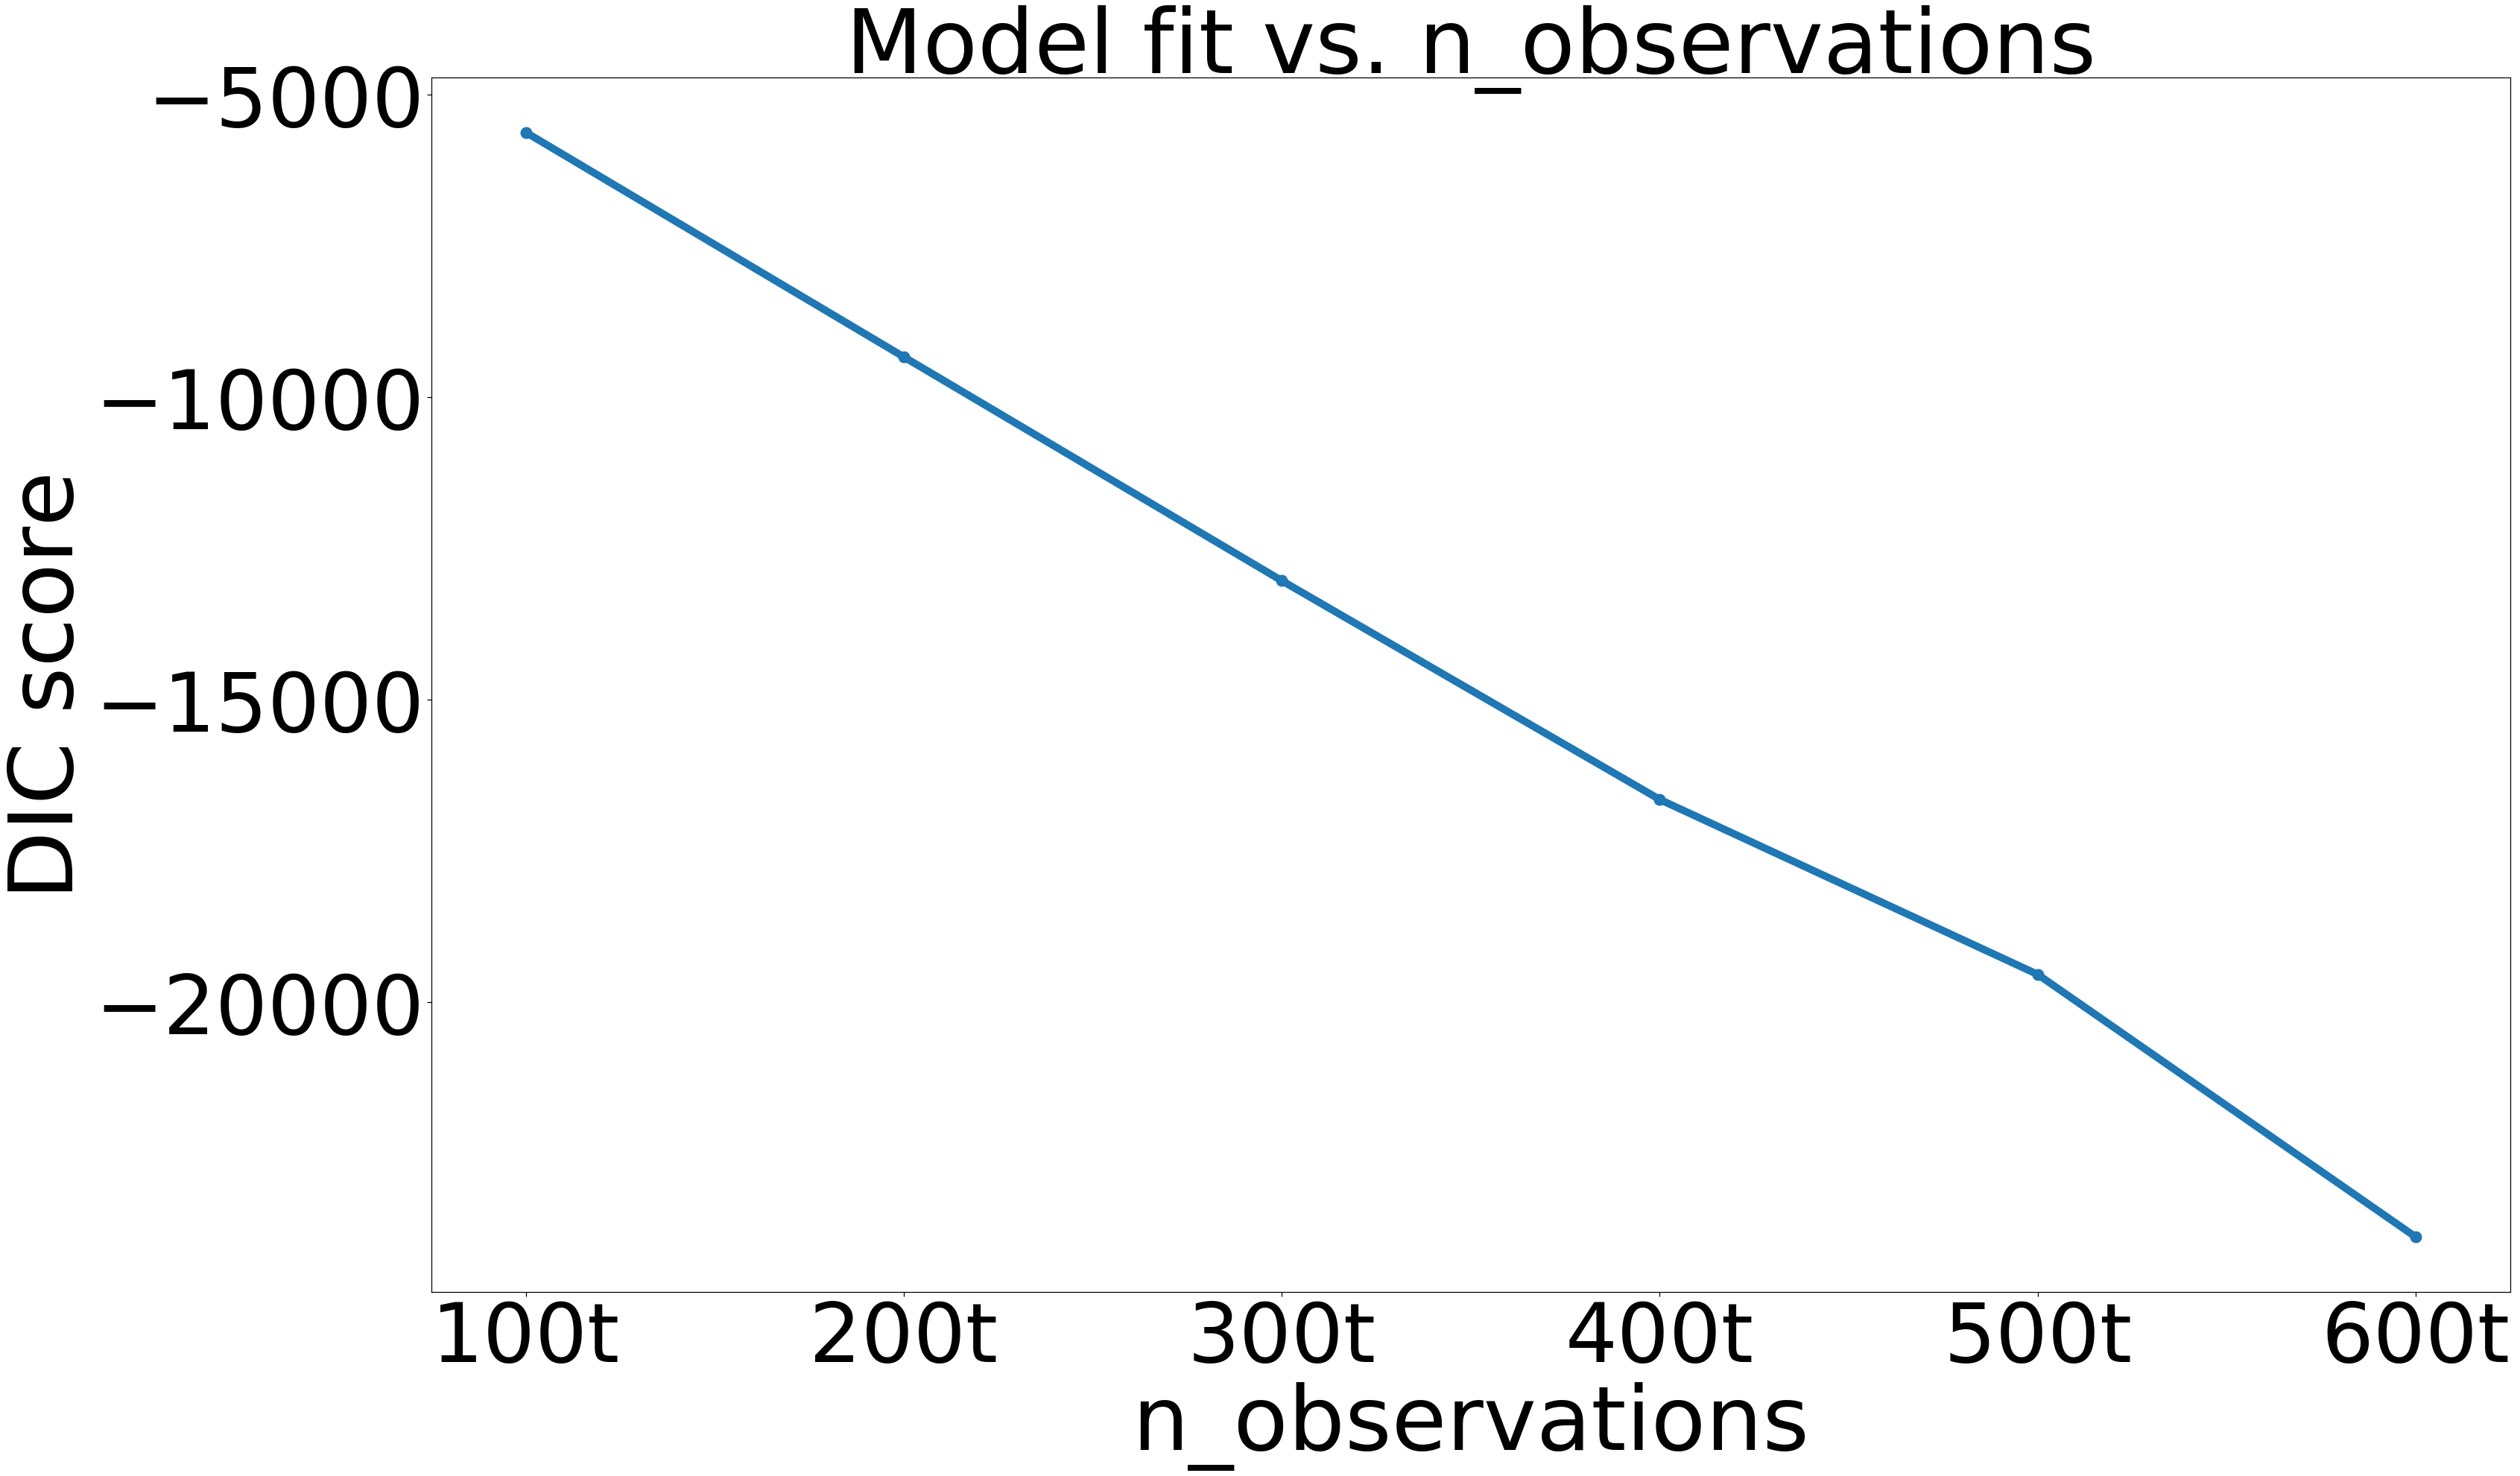

In [35]:
plt.figure(figsize=(50,30))
plt.plot(m_names, dics, '.-')
plt.title("Model fit vs. n_observations")
plt.xlabel('n_observations')
plt.ylabel('DIC score')

In [13]:
#use standard error of the mean.
# N=24
# p_se = std_param / np.sqrt(N)
# A small standard error indicates that a sample statistic
# estimates a population parameter with high precision. 
n_subjects=24

In [4]:
std_tCPP_hc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'std'] ]

std_tCPP_lc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'std'] ]

std_tCPP_lv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'std'] ]

std_tCPP_hv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [29]:
mean_tCPP_hc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0] ]

mean_tCPP_lc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0] ]

mean_tCPP_lv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0] ]

mean_tCPP_hv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [22]:
mean_vB_hc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0] ]

mean_vB_lc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0] ]

mean_vB_lv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0] ]

mean_vB_hv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [7]:
std_vB_hc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hc]'], 'std'] ]

std_vB_lc = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lc]'], 'std'] ]

std_vB_lv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lv]'], 'std'] ]

std_vB_hv = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hv]'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [8]:
std_a = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['a'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['a'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['a'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['a'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['a'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['a'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [9]:
std_z = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['z'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['z'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['z'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['z'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['z'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['z'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [10]:
std_v_intercept = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_Intercept'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_Intercept'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [11]:
std_t_intercept = [t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_Intercept'], 'std'],
  t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_Intercept'], 'std'],
 t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_Intercept'], 'std'] ]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [14]:
se_a = std_a/np.sqrt(n_subjects)
se_z = std_z/np.sqrt(n_subjects)

se_t_intercept = std_t_intercept/np.sqrt(n_subjects)
se_v_intercept = std_v_intercept/np.sqrt(n_subjects)

In [15]:
se_tCPP_hc = std_tCPP_hc/np.sqrt(n_subjects)
se_tCPP_hv = std_tCPP_hv/np.sqrt(n_subjects)
se_tCPP_lc = std_tCPP_lc/np.sqrt(n_subjects)
se_tCPP_lv = std_tCPP_lv/np.sqrt(n_subjects)

In [16]:
se_vB_hc = std_vB_hc/np.sqrt(n_subjects)
se_vB_hv = std_vB_hv/np.sqrt(n_subjects)
se_vB_lc = std_vB_lc/np.sqrt(n_subjects)
se_vB_lv = std_vB_lv/np.sqrt(n_subjects)

In [17]:
vB_hc_sqr_asymp_err = np.square(se_vB_hc[-1] - se_vB_hc)
vB_hv_sqr_asymp_err = np.square(se_vB_hv[-1] - se_vB_hv)
vB_lc_sqr_asymp_err = np.square(se_vB_lc[-1] - se_vB_lc)
vB_lv_sqr_asymp_err = np.square(se_vB_lv[-1] - se_vB_lv)

In [18]:
tCPP_hc_sqr_asymp_err = np.square(se_tCPP_hc[-1] - se_tCPP_hc)
tCPP_hv_sqr_asymp_err = np.square(se_tCPP_hv[-1] - se_tCPP_hv)
tCPP_lc_sqr_asymp_err = np.square(se_tCPP_lc[-1] - se_tCPP_lc)
tCPP_lv_sqr_asymp_err = np.square(se_tCPP_lv[-1] - se_tCPP_lv)

In [31]:
mean_vB_hc_sqr_asymp_err = np.square(mean_vB_hc[-1] - mean_vB_hc)
mean_vB_lc_sqr_asymp_err = np.square(mean_vB_lc[-1] - mean_vB_lc)
mean_vB_hv_sqr_asymp_err = np.square(mean_vB_hv[-1] - mean_vB_hv)
mean_vB_lv_sqr_asymp_err = np.square(mean_vB_lv[-1] - mean_vB_lv)

In [32]:
mean_tCPP_hc_sqr_asymp_err = np.square(mean_tCPP_hc[-1] - mean_tCPP_hc)
mean_tCPP_lc_sqr_asymp_err = np.square(mean_tCPP_lc[-1] - mean_tCPP_lc)
mean_tCPP_hv_sqr_asymp_err = np.square(mean_tCPP_hv[-1] - mean_tCPP_hv)
mean_tCPP_lv_sqr_asymp_err = np.square(mean_tCPP_lv[-1] - mean_tCPP_lv)

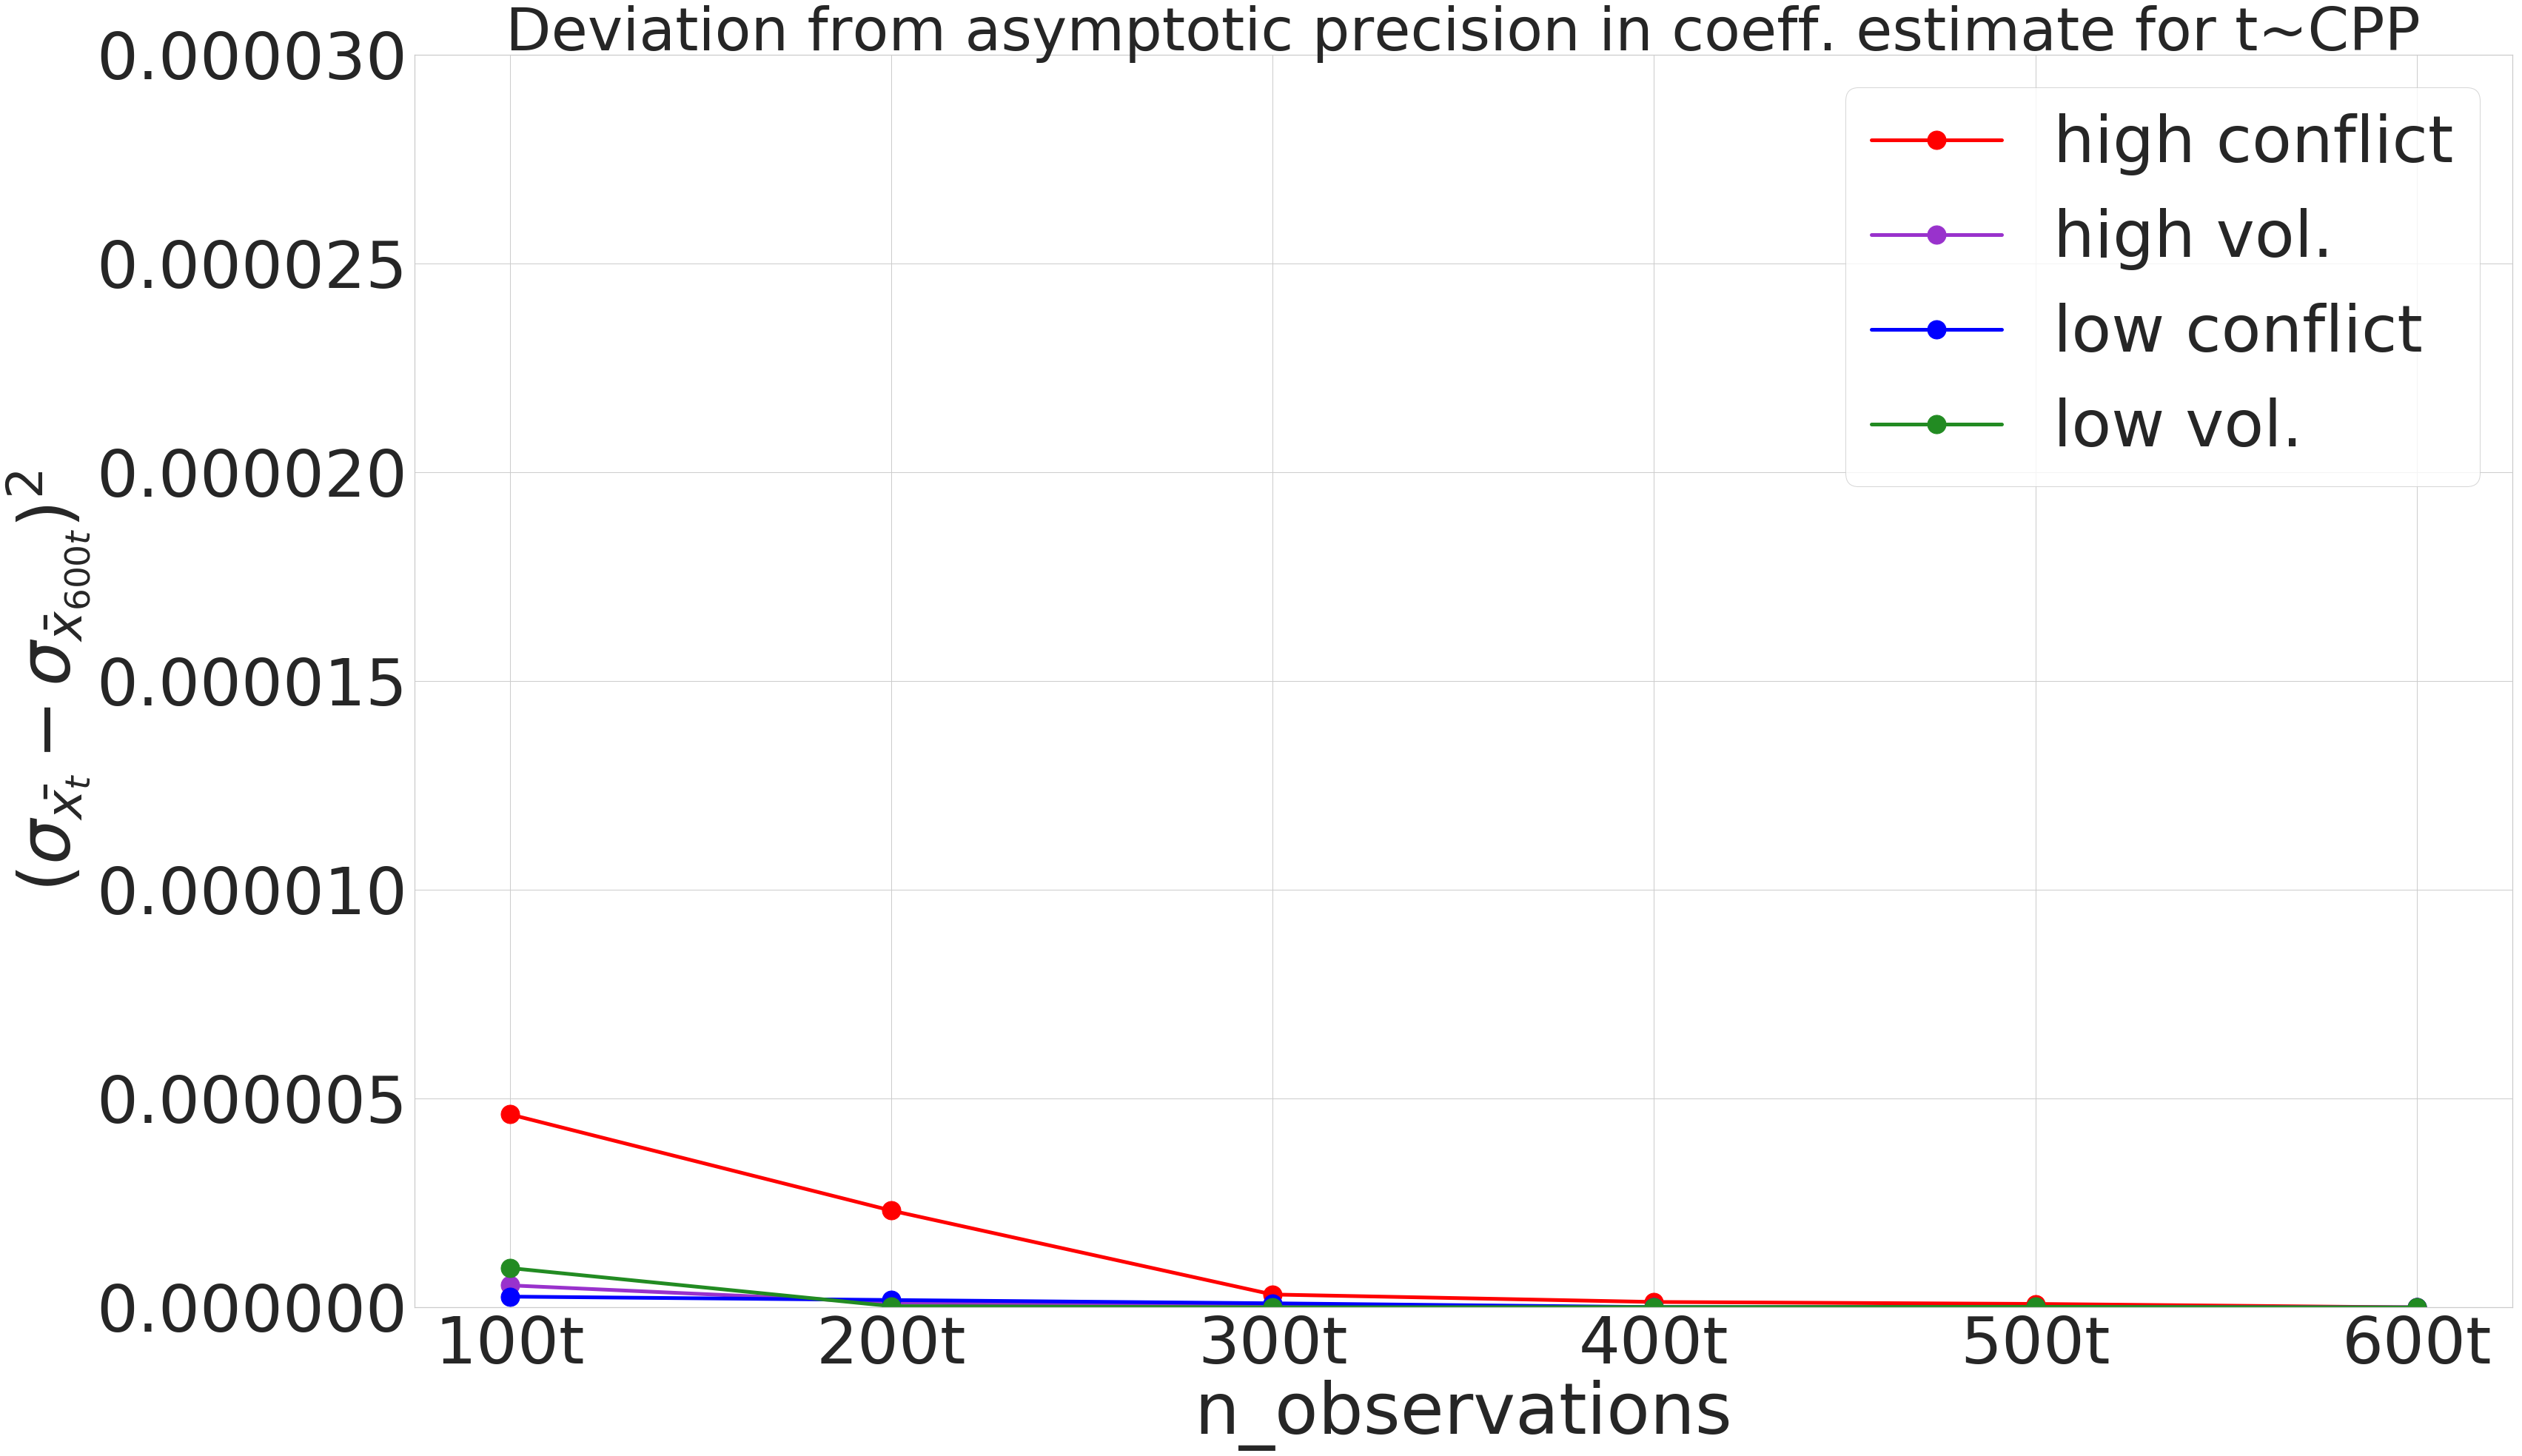

In [275]:
sns.set(font_scale=8)  
sns.set_style("whitegrid")

plt.figure(figsize=(50,30))
plt.plot(m_names, tCPP_hc_sqr_asymp_err, '.-', color='red', 
         label='high conflict', linewidth=5, markersize=50)
plt.plot(m_names, tCPP_hv_sqr_asymp_err, '.-', color='darkorchid',
         label='high vol.',linewidth=5, markersize=50)
plt.plot(m_names, tCPP_lc_sqr_asymp_err, '.-',color='blue', 
         label='low conflict',linewidth=5, markersize=50)
plt.plot(m_names, tCPP_lv_sqr_asymp_err, '.-', color='forestgreen', 
         label='low vol.',linewidth=5, markersize=50)
plt.title("Deviation from asymptotic precision in coeff. estimate for t~CPP", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel( r'$(\sigma_\bar{x_t} - {\sigma_{\bar{x}{}_{600t}}})^2$')
plt.legend()
plt.ylim([0,.00003])
# plt.savefig('tCPP_aysmp_SE_trials.pdf')
plt.tight_layout()
plt.savefig('tCPP_aysmp_SE_trials.jpeg', bbox='tight')


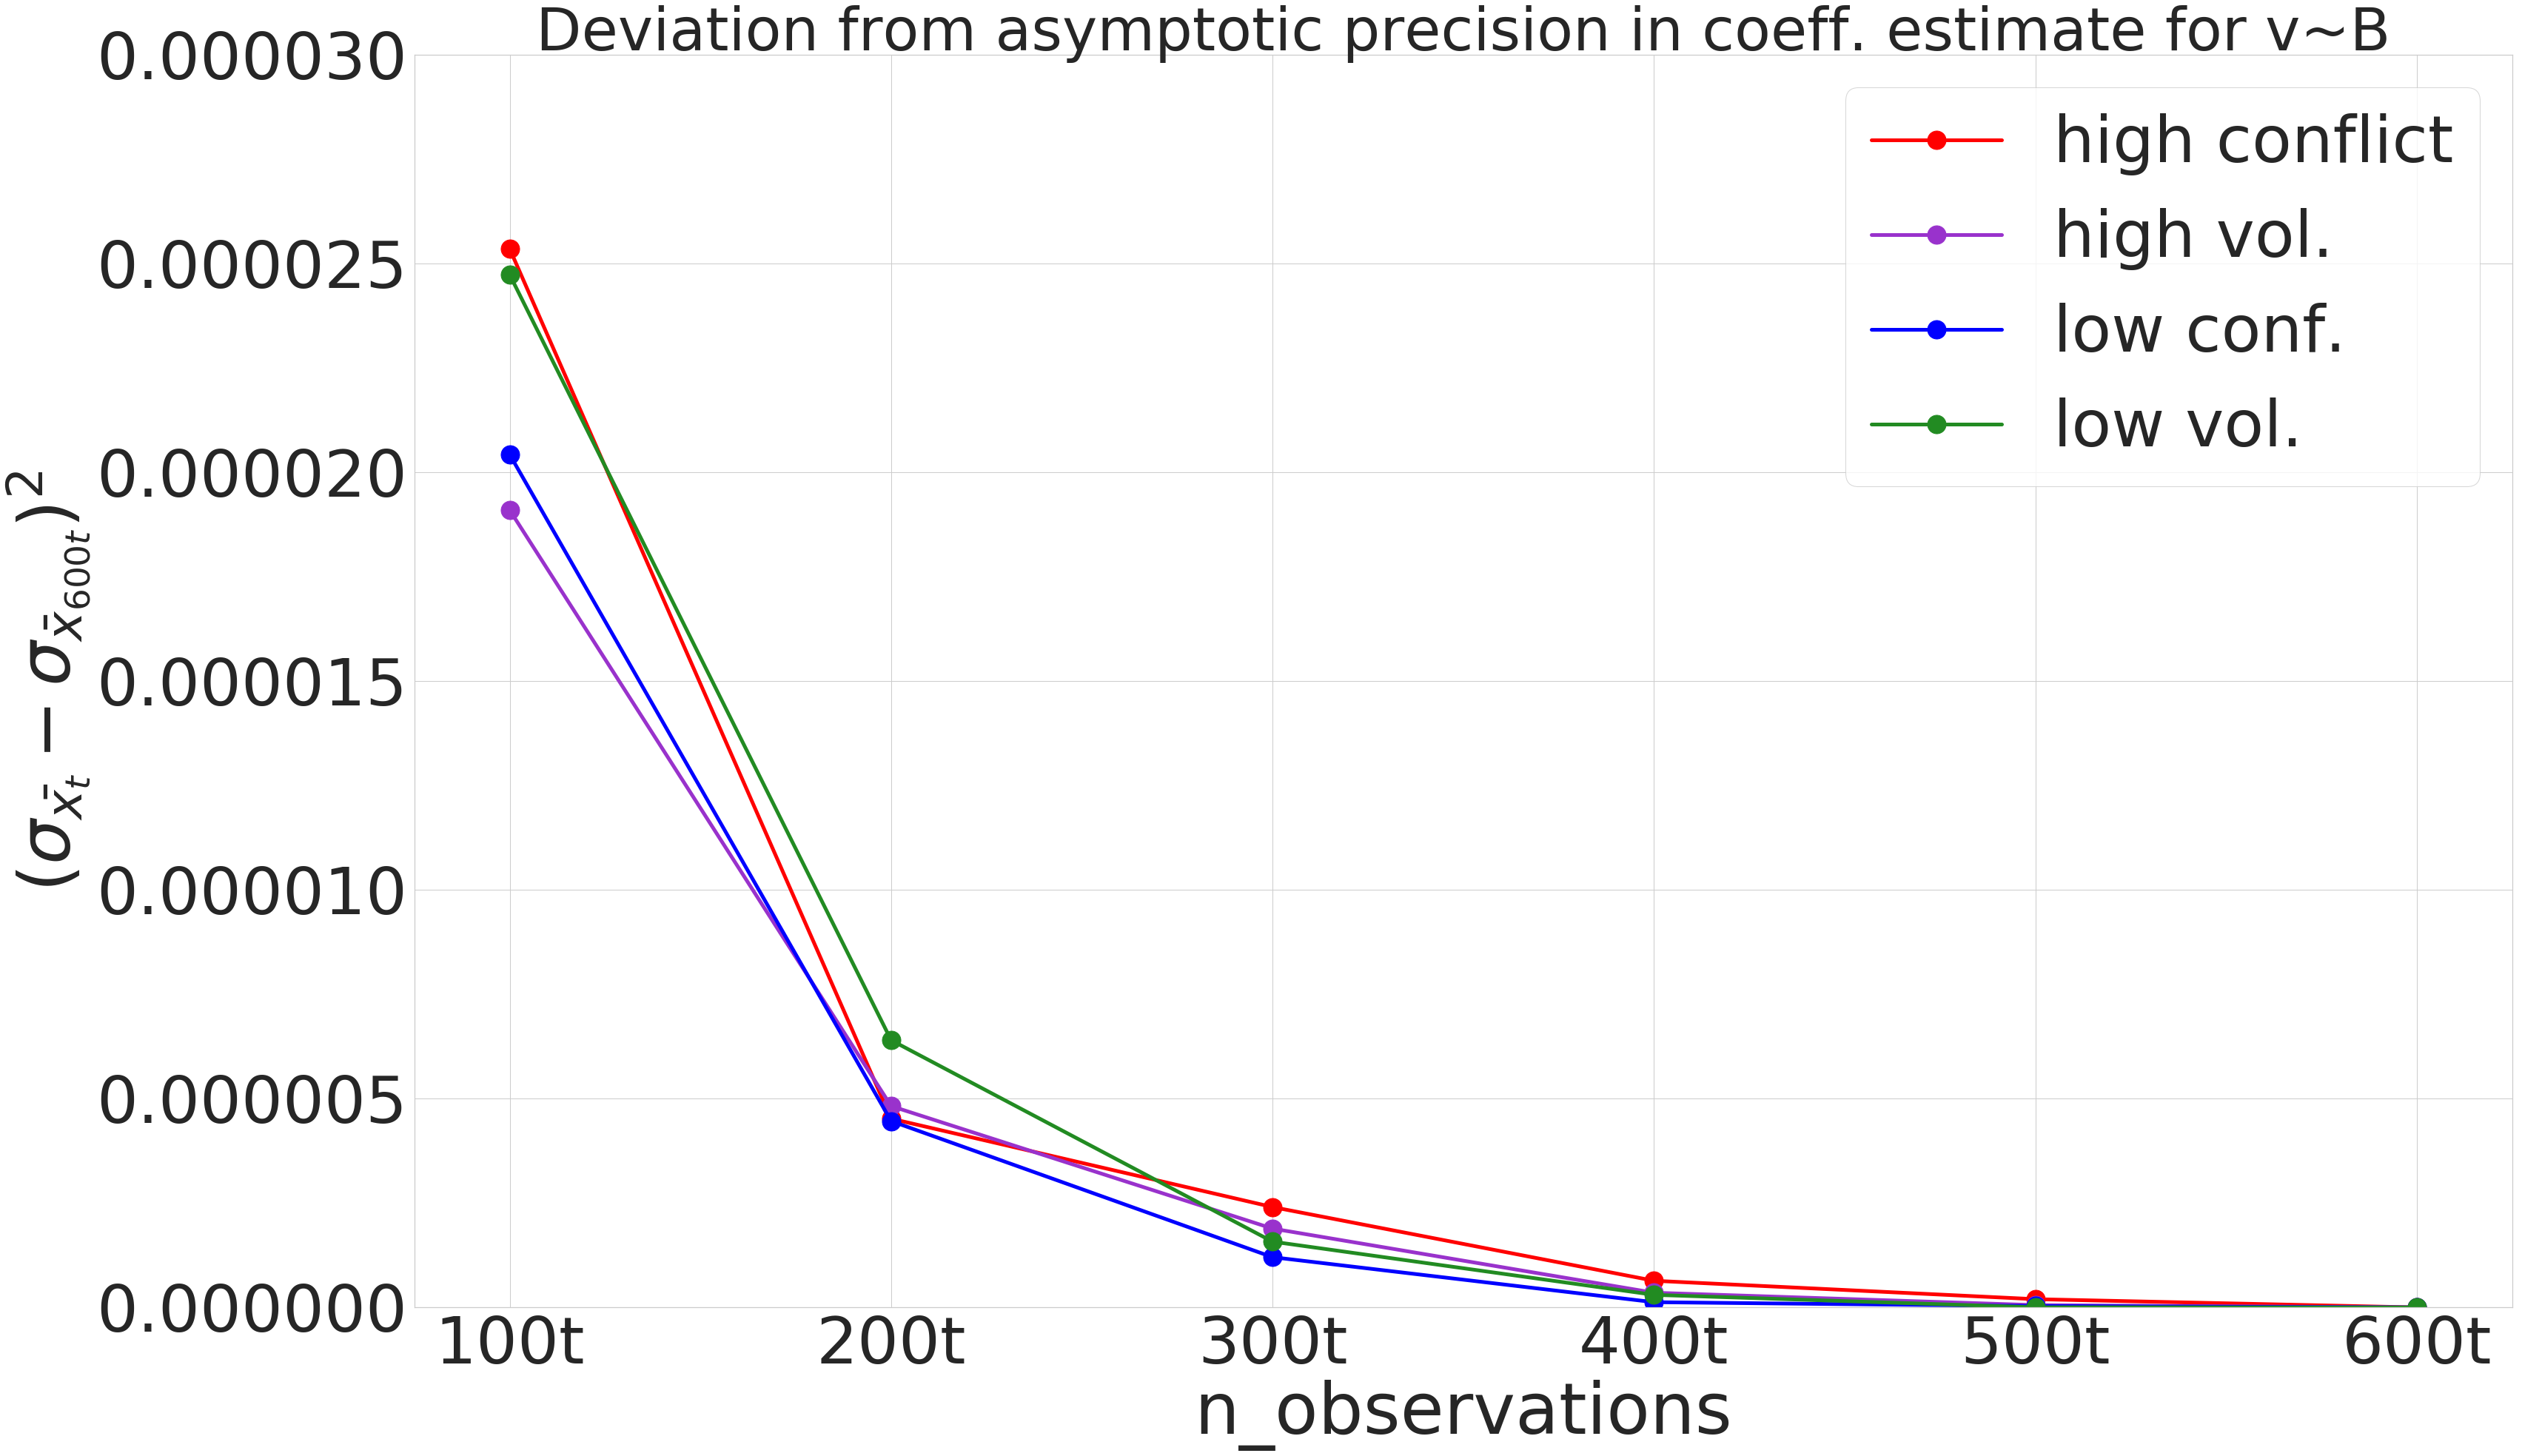

In [276]:
sns.set(font_scale=8)  
sns.set_style("whitegrid")

plt.figure(figsize=(50,30))
plt.plot(m_names, vB_hc_sqr_asymp_err, '.-', color='red',
         label='high conflict',linewidth=5, markersize=50)
plt.plot(m_names, vB_hv_sqr_asymp_err, '.-', color='darkorchid',
         label='high vol.',linewidth=5,  markersize=50)
plt.plot(m_names, vB_lc_sqr_asymp_err, '.-', color='blue',
         label='low conf.',linewidth=5, markersize=50)
plt.plot(m_names, vB_lv_sqr_asymp_err, '.-', color='forestgreen', 
         label='low vol.',linewidth=5, markersize=50)
plt.legend()

plt.title("Deviation from asymptotic precision in coeff. estimate for v~B", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel( r'$(\sigma_\bar{x_t} - {\sigma_{\bar{x}{}_{600t}}})^2$')
plt.ylim([0,.00003])
# plt.savefig('vB_aysmp_SE_trials.pdf')
plt.tight_layout()
plt.savefig('vB_aysmp_SE_trials.jpeg', bbox='tight')


In [ ]:
np.mean(v0 + v_beta_hc * all_obs_reg_data[all_obs_reg_data.condition=='hc']['B'] )

Text(0,0.5,'$\\sigma_\\bar{x_t}$')

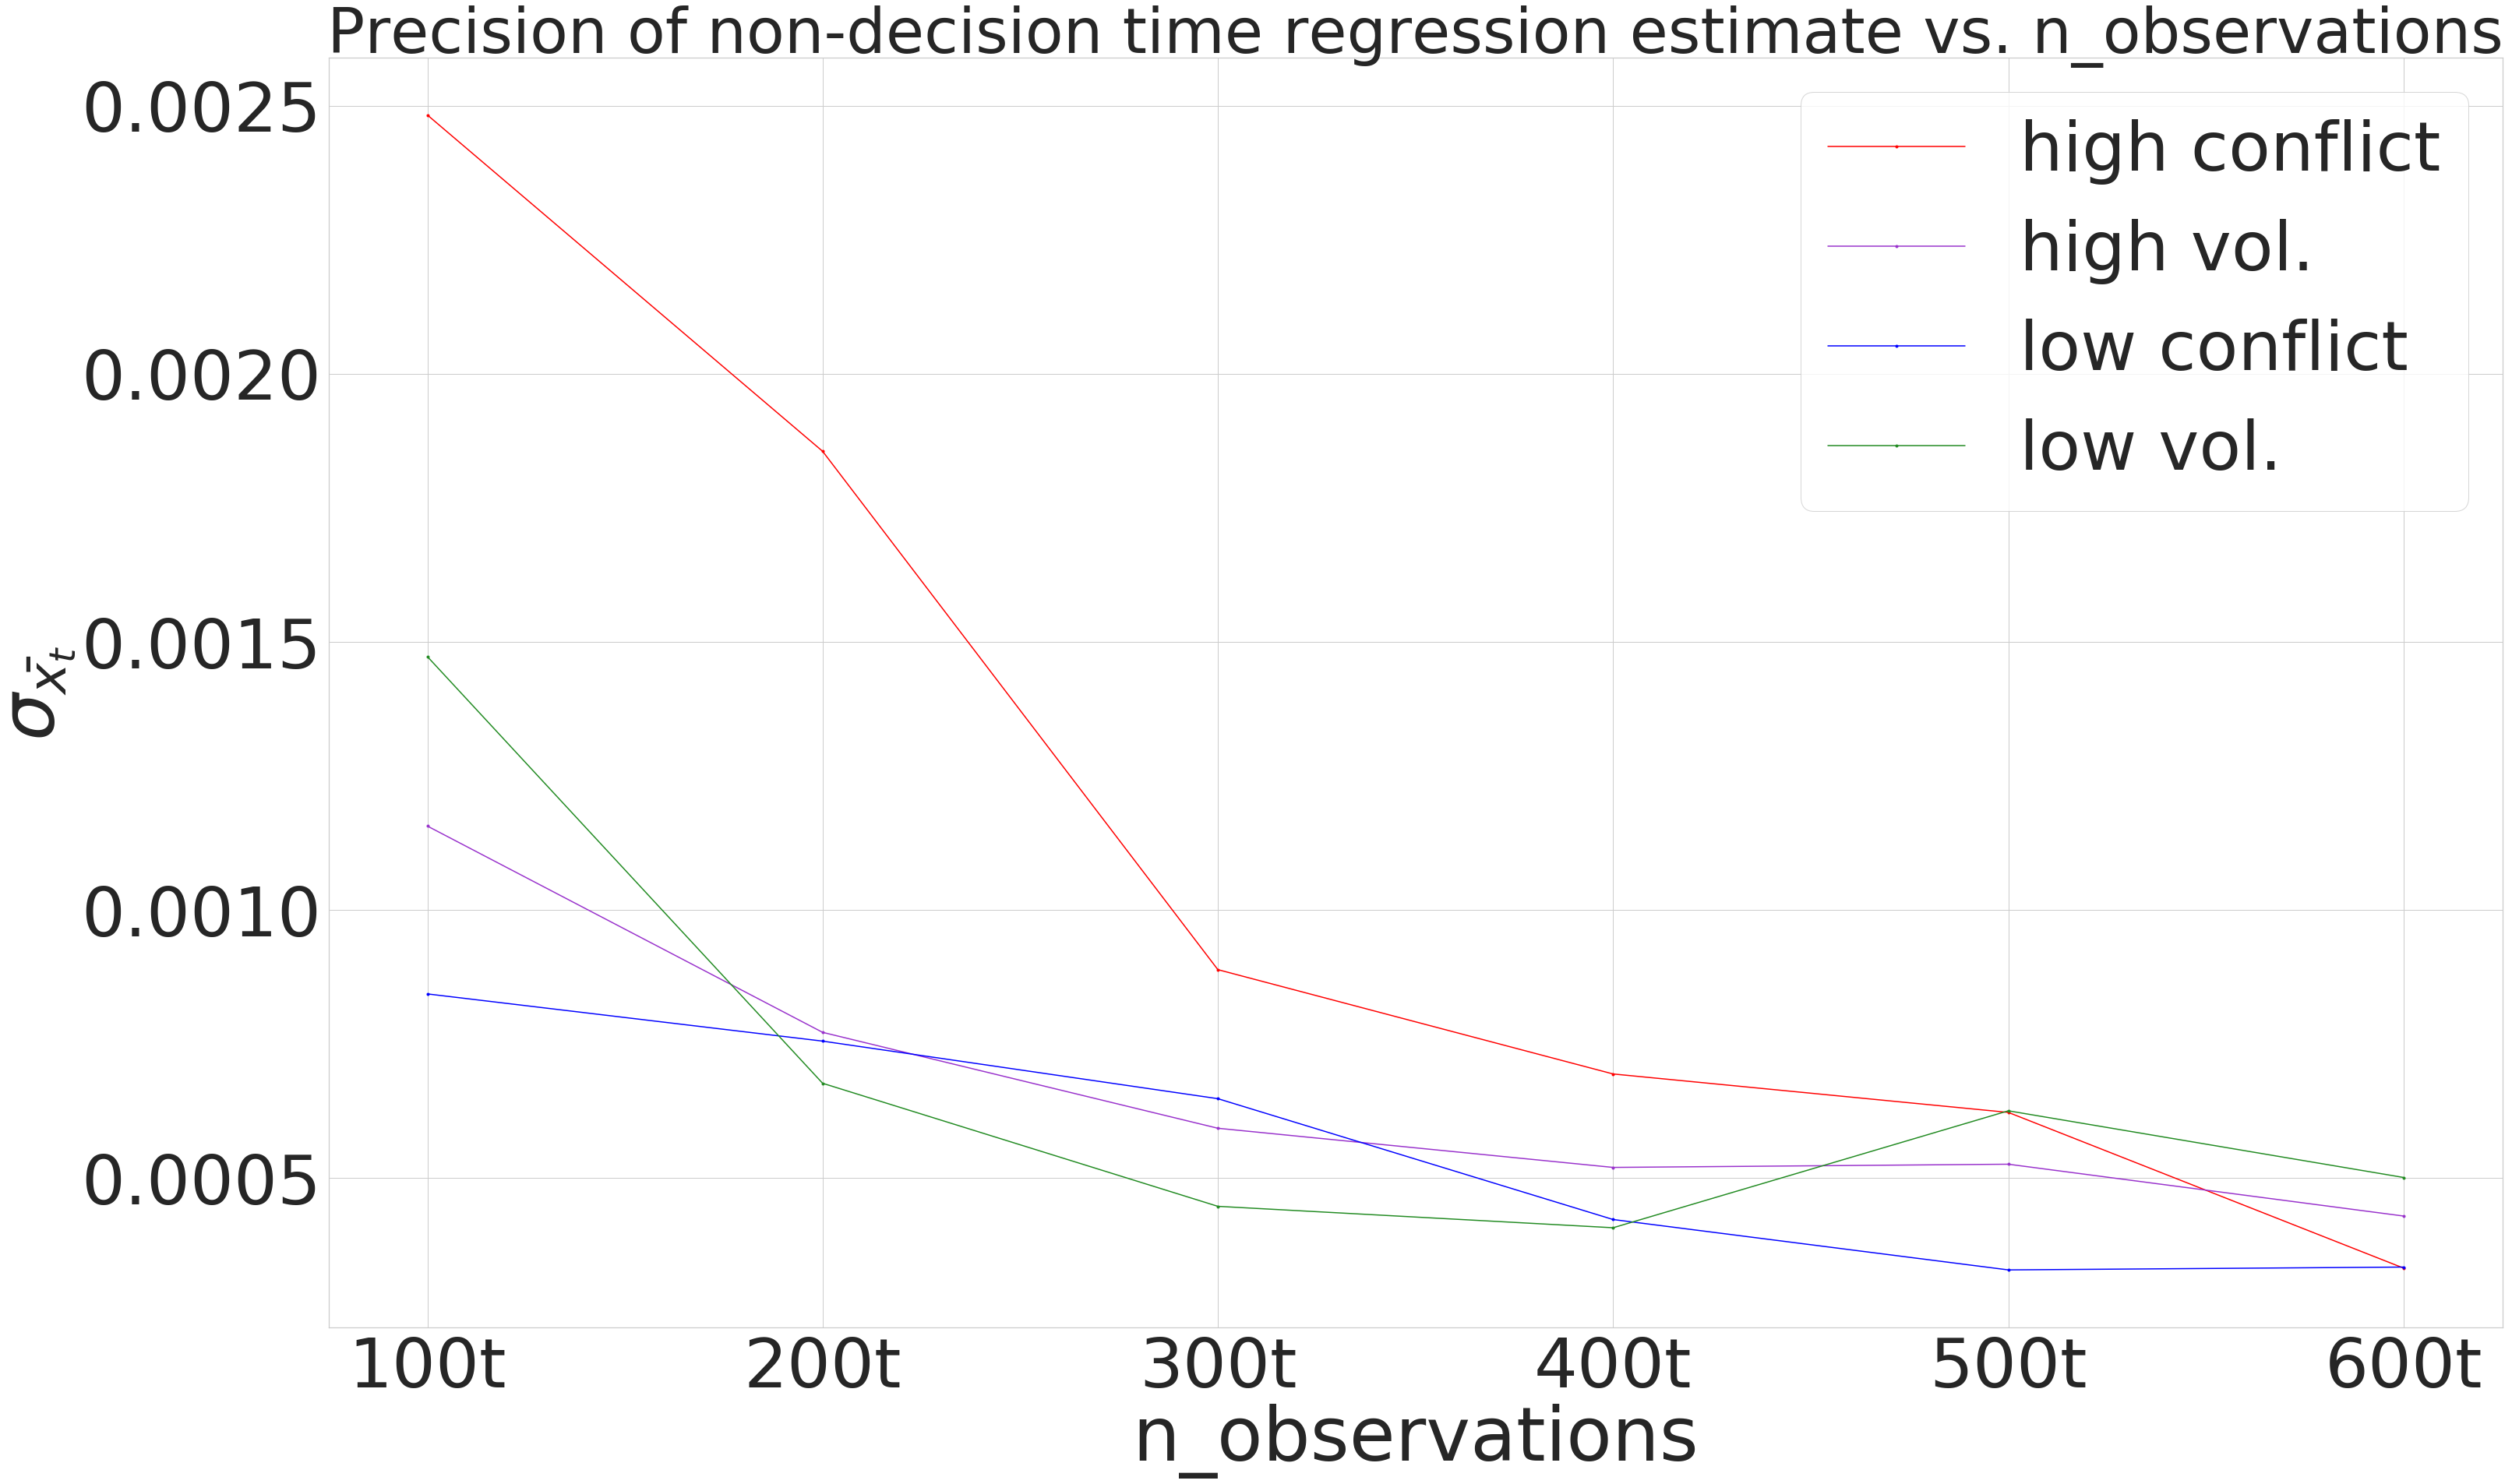

In [156]:
sns.set(font_scale=8)  
sns.set_style("whitegrid")

plt.figure(figsize=(50,30))
plt.plot(m_names, se_tCPP_hc, '.-', color='red',label='high conflict')
plt.plot(m_names, se_tCPP_hv, '.-', color='darkorchid',label='high vol.')
plt.plot(m_names, se_tCPP_lc, '.-', color='blue', label='low conflict')
plt.plot(m_names, se_tCPP_lv, '.-', color='forestgreen', label='low vol.')
plt.legend()

plt.title("Precision of non-decision time regression estimate vs. n_observations", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel(r'$\sigma_\bar{x_t}$')


In [157]:
sns.set(font_scale=8)  
sns.set_style("whitegrid")

plt.figure(figsize=(50,30))
plt.plot(m_names, se_vB_hc, '.-', color='red',label='high conflict')
plt.plot(m_names, se_vB_hv, '.-',  color='darkorchid',label='high vol.')
plt.plot(m_names, se_vB_lc, '.-',color='blue', label='low conflict')
plt.plot(m_names, se_vB_lv, '.-', color='forestgreen', label='low vol.')
plt.legend()

plt.title("Precision of drift-rate regression estimate vs. n_observations", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel(r'$\sigma_\bar{x_t}$')
# plt.ylim([0,.01])

Text(0,0.5,'$\\sigma_\\bar{x_t}$')

(0, 0.01)

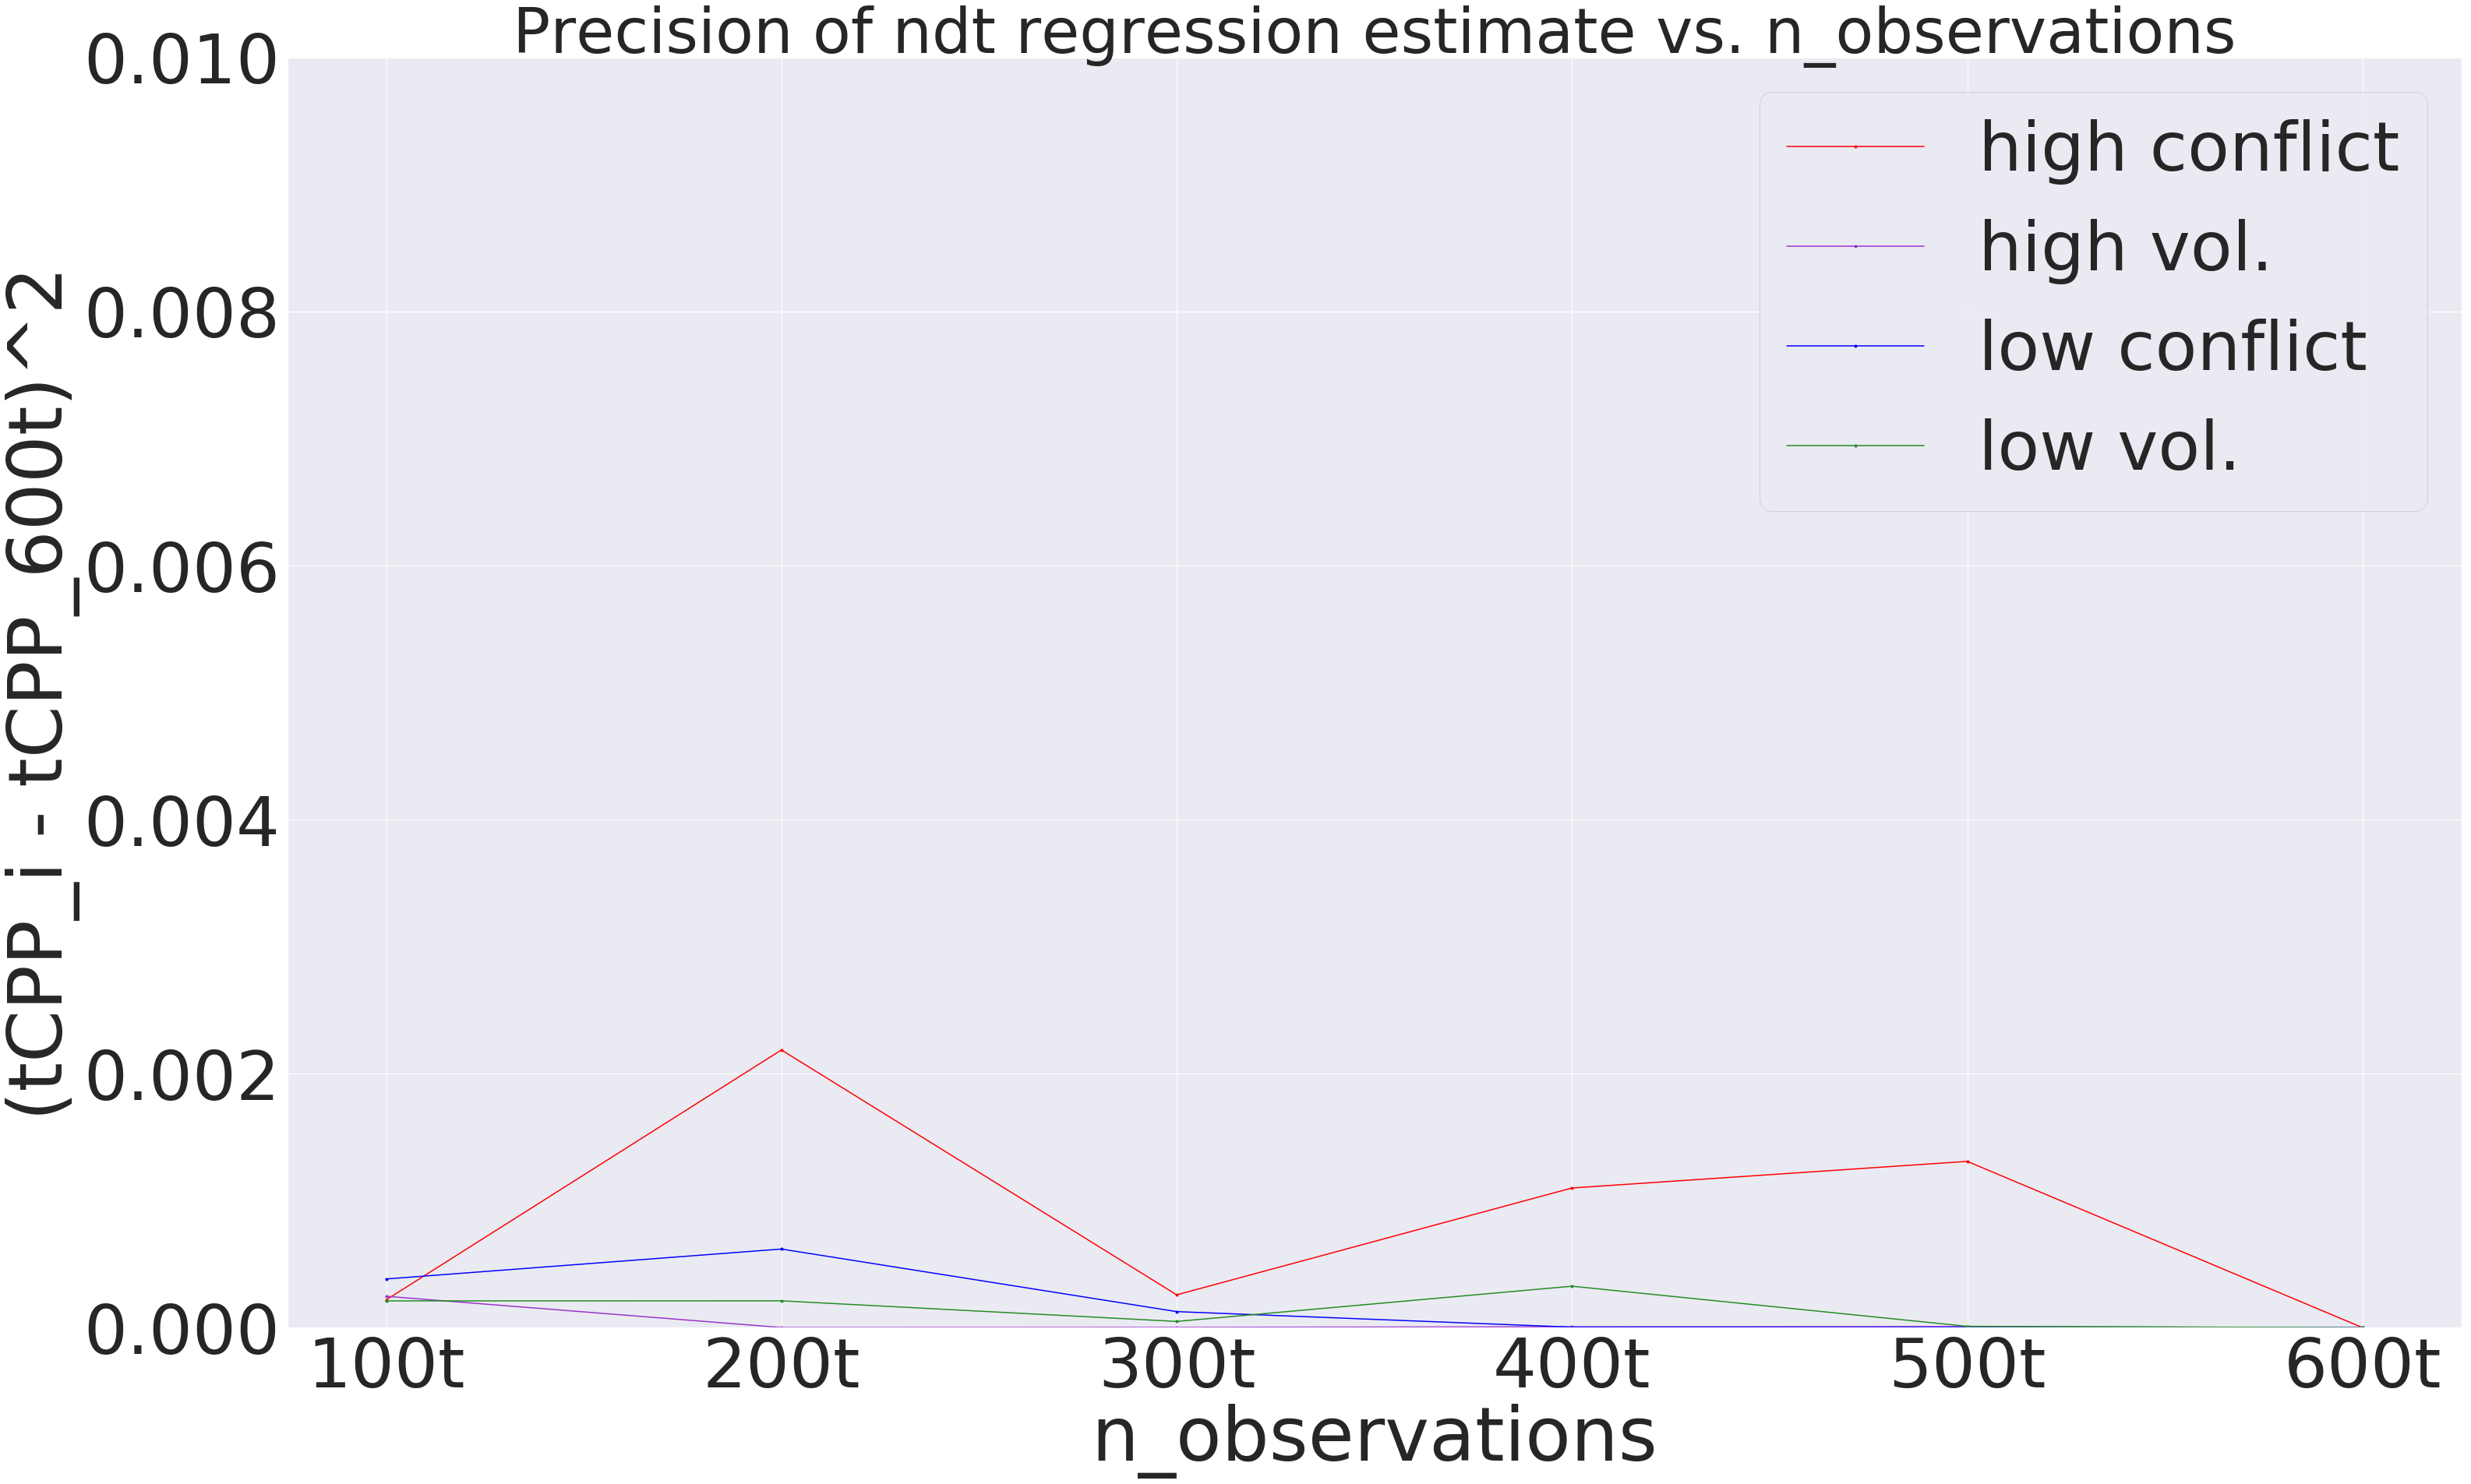

In [96]:
sns.set(font_scale=8)  
plt.figure(figsize=(50,30))
plt.plot(m_names, mean_tCPP_hc_sqr_asymp_err, '.-', color='red',label='high conflict')
plt.plot(m_names, mean_tCPP_hv_sqr_asymp_err, '.-', color='darkorchid',label='high vol.')
plt.plot(m_names, mean_tCPP_lc_sqr_asymp_err, '.-',color='blue', label='low conflict')
plt.plot(m_names, mean_tCPP_lv_sqr_asymp_err, '.-', color='forestgreen', label='low vol.')
plt.legend()
plt.title("Precision of ndt regression estimate vs. n_observations", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel( '(tCPP_i - tCPP_600t)^2')
plt.ylim([0,.01])

(0, 0.01)

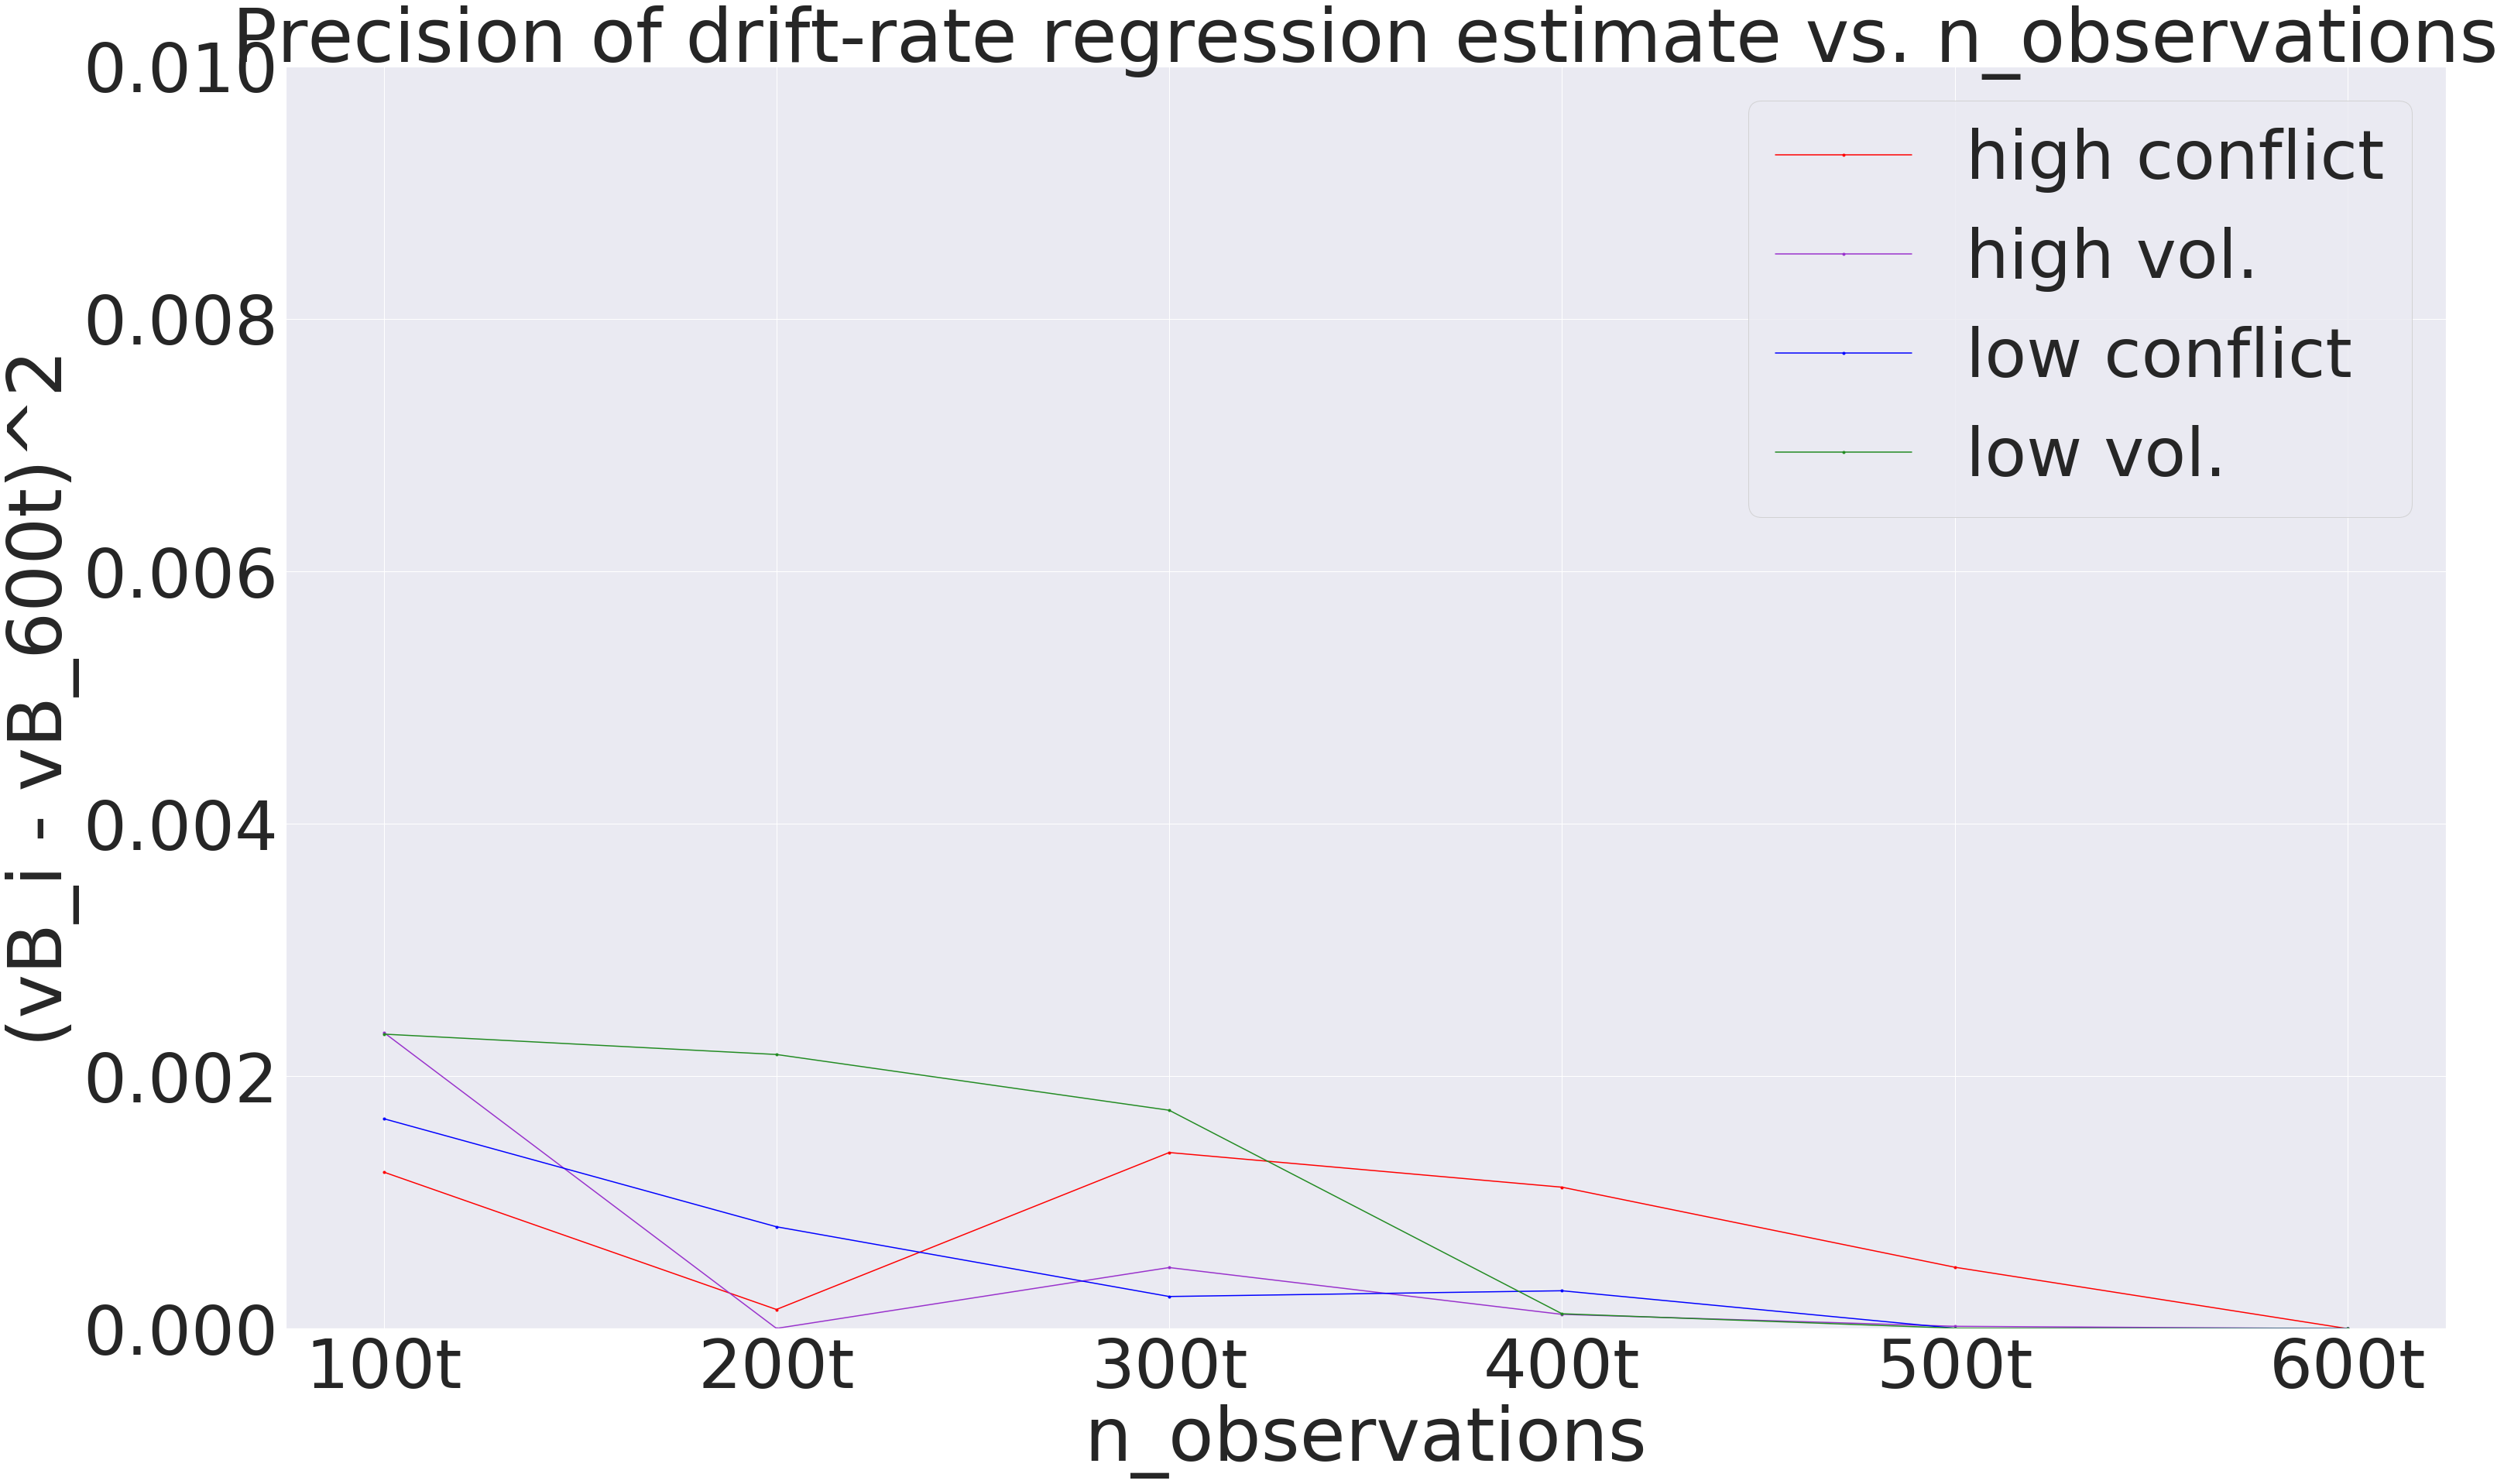

In [98]:
sns.set(font_scale=8)  
plt.figure(figsize=(50,30))
plt.plot(m_names, mean_vB_hc_sqr_asymp_err, '.-', color='red',label='high conflict')
plt.plot(m_names, mean_vB_hv_sqr_asymp_err, '.-', color='darkorchid',label='high vol.')
plt.plot(m_names, mean_vB_lc_sqr_asymp_err, '.-',color='blue', label='low conflict')
plt.plot(m_names, mean_vB_lv_sqr_asymp_err, '.-', color='forestgreen', label='low vol.')
plt.legend()
plt.title("Precision of drift-rate regression estimate vs. n_observations")
plt.xlabel('n_observations')
plt.ylabel( '(vB_i - vB_600t)^2')
plt.ylim([0,.01])

In [221]:
#plot posteriors for winning model 
v_hc_t100 , v_hv_t100 ,  v_lc_t100 , v_lv_t100  = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t100 , t_hv_t100 , t_lc_t100 , t_lv_t100  = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [222]:
#plot posteriors for winning model 
v_hc_t200 , v_hv_t200 ,  v_lc_t200 , v_lv_t200  = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t200 , t_hv_t200 , t_lc_t200 , t_lv_t200  = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [223]:
#plot posteriors for winning model 
v_hc_t300 , v_hv_t300 ,  v_lc_t300 , v_lv_t300  = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t300 , t_hv_t300 , t_lc_t300 , t_lv_t300  = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [224]:
#plot posteriors for winning model 
v_hc_t400 , v_hv_t400 ,  v_lc_t400 , v_lv_t400  = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t400 , t_hv_t400 , t_lc_t400 , t_lv_t400  = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [225]:
#plot posteriors for winning model 
v_hc_t500 , v_hv_t500 ,  v_lc_t500 , v_lv_t500  = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t500 , t_hv_t500 , t_lc_t500 , t_lv_t500  = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


In [226]:
#plot posteriors for winning model 
v_hc_t600 , v_hv_t600 ,  v_lc_t600 , v_lv_t600  = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hc]', 'v_B:C(condition)[hv]', 
                                                             'v_B:C(condition)[lc]', 'v_B:C(condition)[lv]'],
                                                          'node']


t_hc_t600 , t_hv_t600 , t_lc_t600 , t_lv_t600  = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['t_cpp:C(condition)[hc]', 't_cpp:C(condition)[hv]', 
                                                             't_cpp:C(condition)[lc]', 't_cpp:C(condition)[lv]'],
                                                          'node']

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys


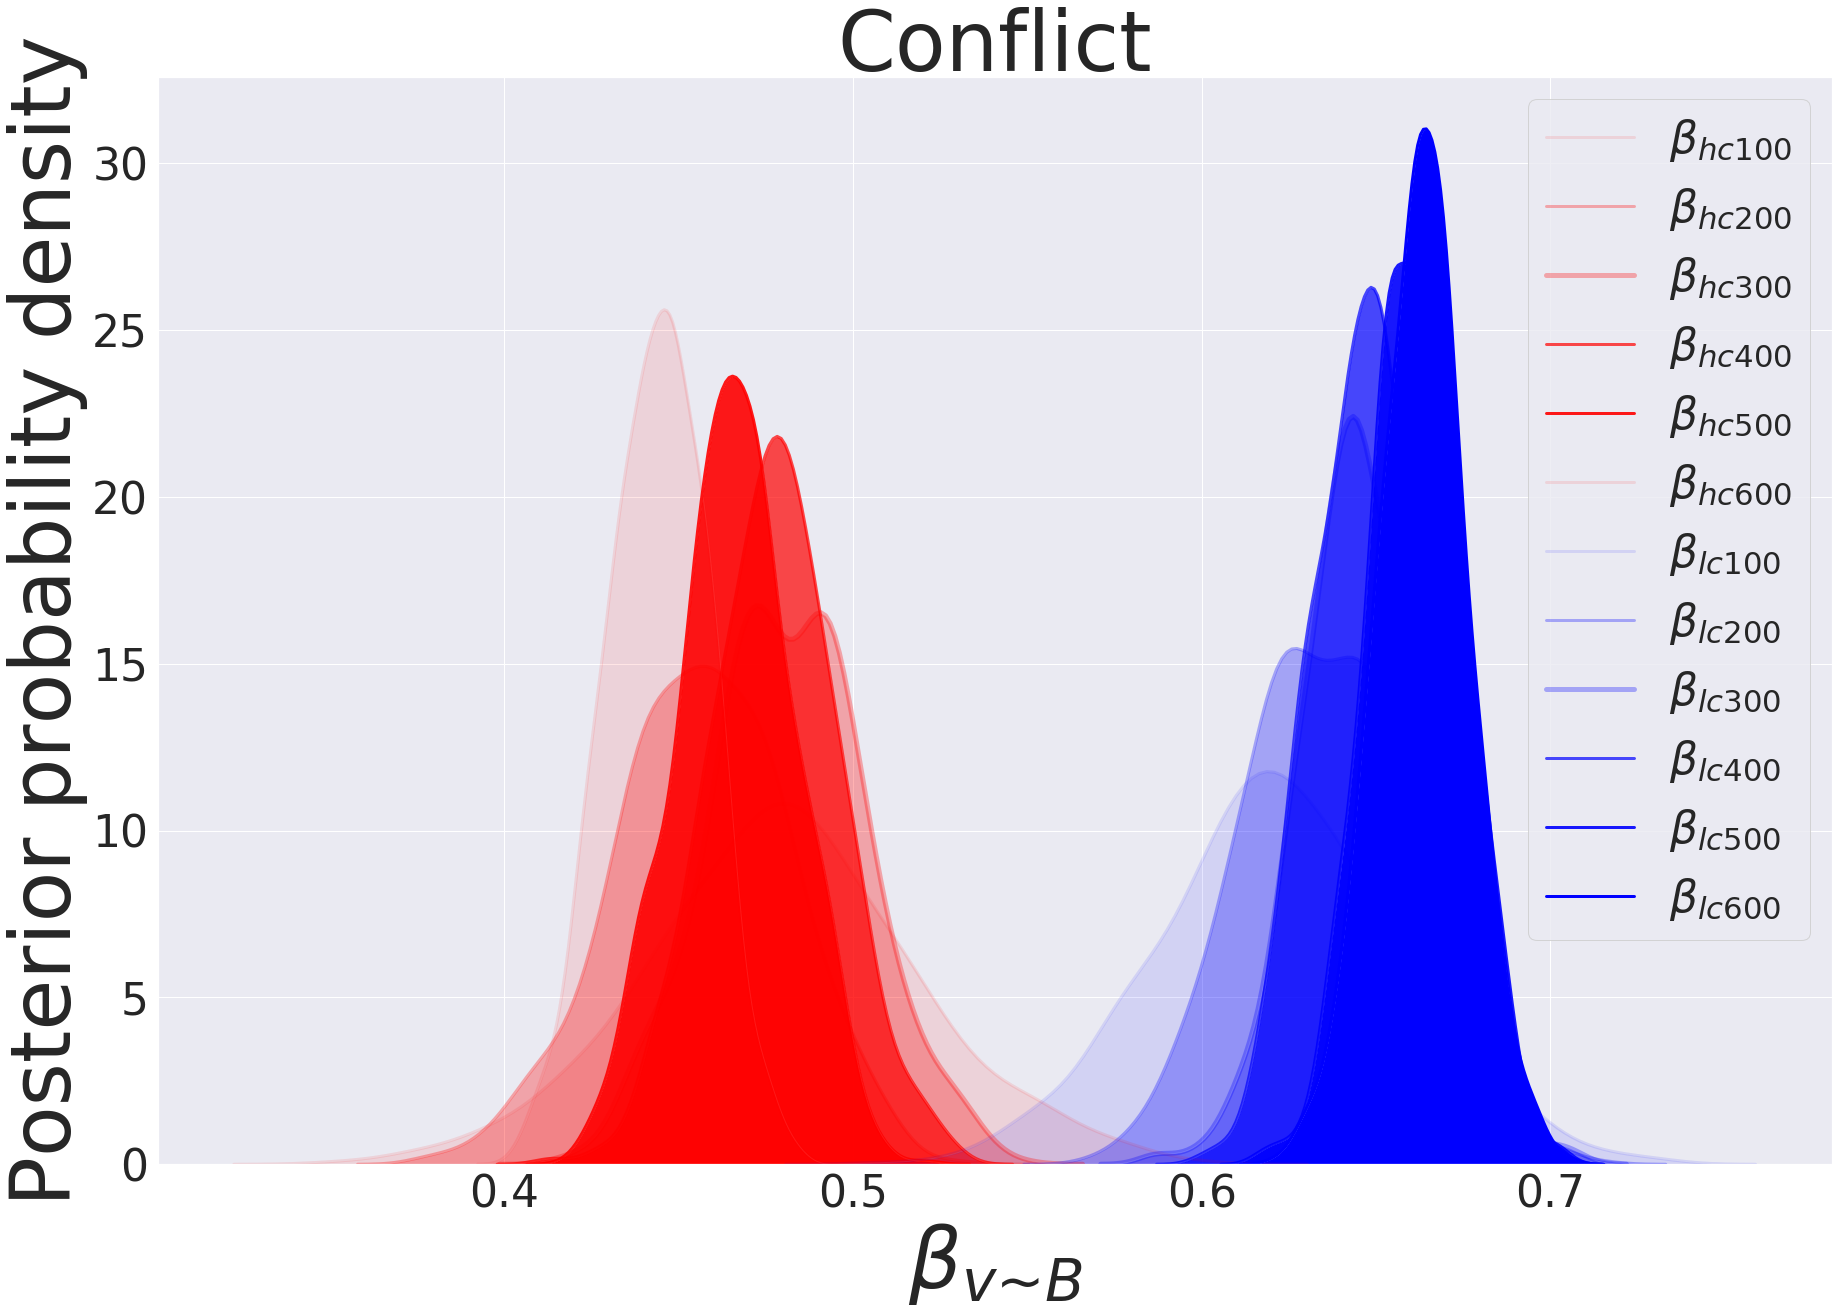

In [267]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(v_hc_t100.trace(), label=r'$\beta_{hc100}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                  'alpha': 0.1})
sns.distplot(v_hc_t200.trace(), label=r'$\beta_{hc200}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha': 0.3
                                                                                               })
sns.distplot(v_hc_t300.trace(), label=r'$\beta_{hc300}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 
                                                                                                'linewidth': 5, 'alpha': 0.3})
sns.distplot(v_hc_t400.trace(), label=r'$\beta_{hc400}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha':0.7})
sns.distplot(v_hc_t500.trace(), label=r'$\beta_{hc500}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                'alpha':0.9})
sns.distplot(v_hc_t600.trace(), label=r'$\beta_{hc600}$', hist=False,rug=False,color='red', kde_kws = {'shade': True,
                                                                                                    'linewidth': 3, 'alpha': 0.1})



sns.distplot(v_lc_t100.trace(), label=r'$\beta_{lc100}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 
                                                                                                     'linewidth': 3, 'alpha': 0.1})
sns.distplot(v_lc_t200.trace(), label=r'$\beta_{lc200}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha': 0.3})
sns.distplot(v_lc_t300.trace(), label=r'$\beta_{lc300}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 
                                                                                            'linewidth': 5, 'alpha': 0.3})
sns.distplot(v_lc_t400.trace(), label=r'$\beta_{lc400}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha':0.7})
sns.distplot(v_lc_t500.trace(), label=r'$\beta_{lc500}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                            'alpha':0.9})
sns.distplot(v_lc_t600.trace(), label=r'$\beta_{lc600}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                 'alpha': 1})

# sns.distplot(v_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')
# plt.xlim([-0.05,0.05])
# plt.savefig('vB_posterior_trials_conflict.pdf')
plt.savefig('vB_posterior_trials_conflict.jpeg', bbox='tight')


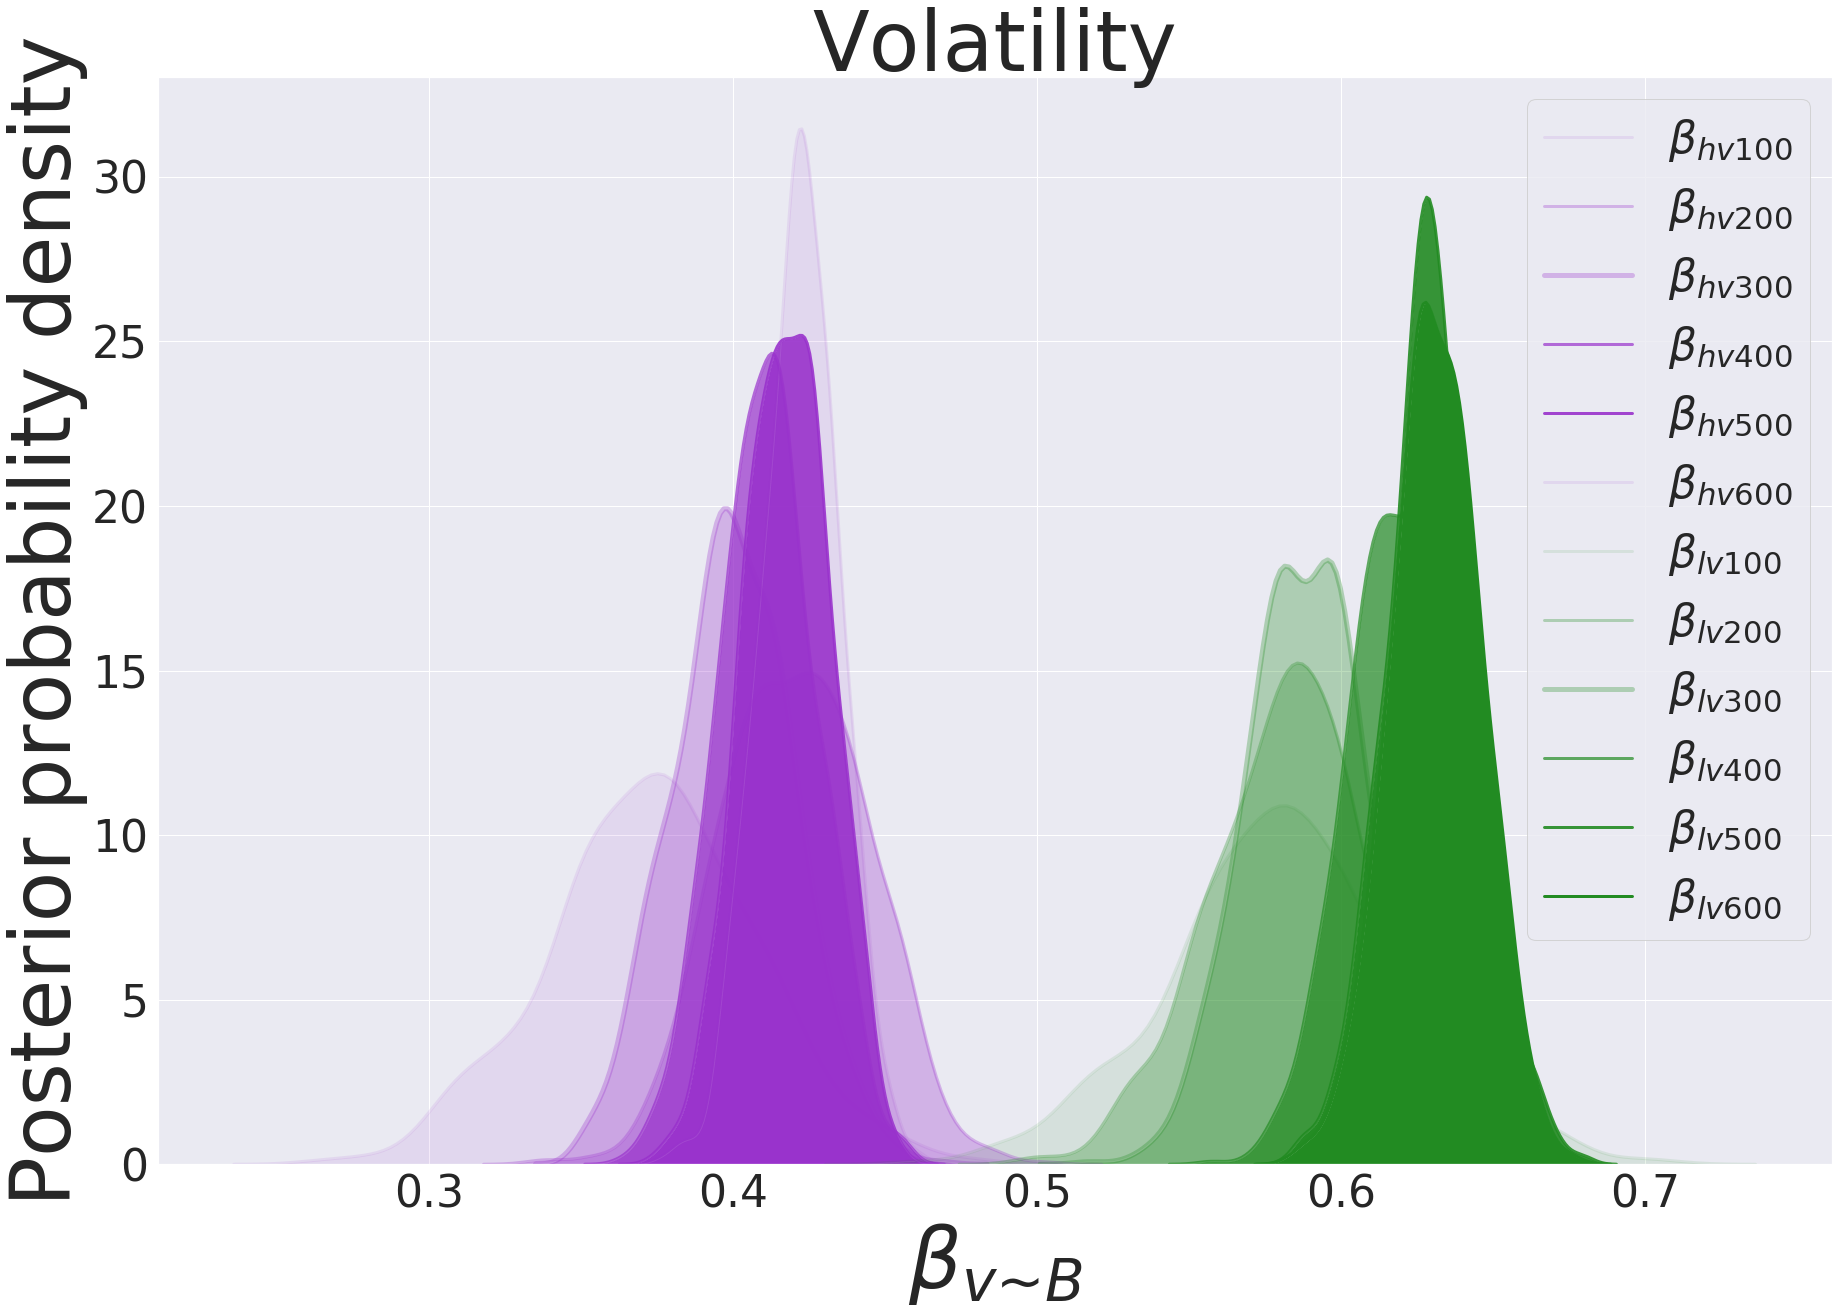

In [264]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(v_hv_t100.trace(), label=r'$\beta_{hv100}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                  'alpha': 0.1})
sns.distplot(v_hv_t200.trace(), label=r'$\beta_{hv200}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha': 0.3
                                                                                               })
sns.distplot(v_hv_t300.trace(), label=r'$\beta_{hv300}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 
                                                                                                'linewidth': 5, 'alpha': 0.3})
sns.distplot(v_hv_t400.trace(), label=r'$\beta_{hv400}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha':0.7})
sns.distplot(v_hv_t500.trace(), label=r'$\beta_{hv500}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                'alpha':0.9})
sns.distplot(v_hv_t600.trace(), label=r'$\beta_{hv600}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True,
                                                                                                    'linewidth': 3, 'alpha': 0.1})



sns.distplot(v_lv_t100.trace(), label=r'$\beta_{lv100}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 
                                                                                                     'linewidth': 3, 'alpha': 0.1})
sns.distplot(v_lv_t200.trace(), label=r'$\beta_{lv200}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha': 0.3})
sns.distplot(v_lv_t300.trace(), label=r'$\beta_{lv300}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 
                                                                                            'linewidth': 5, 'alpha': 0.3})
sns.distplot(v_lv_t400.trace(), label=r'$\beta_{lv400}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha':0.7})
sns.distplot(v_lv_t500.trace(), label=r'$\beta_{lv500}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                            'alpha':0.9})
sns.distplot(v_lv_t600.trace(), label=r'$\beta_{lv600}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                 'alpha': 1})

# sns.distplot(v_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{v\textasciitilde B}$',fontsize='xx-large')
# plt.xlim([-0.05,0.05])
# plt.savefig('tCPP_betas_conflict_OBS_acc.png', dpi=600)

# plt.savefig('vB_posterior_trials_vol.pdf')
plt.savefig('vB_posterior_trials_vol.jpeg', bbox='tight')


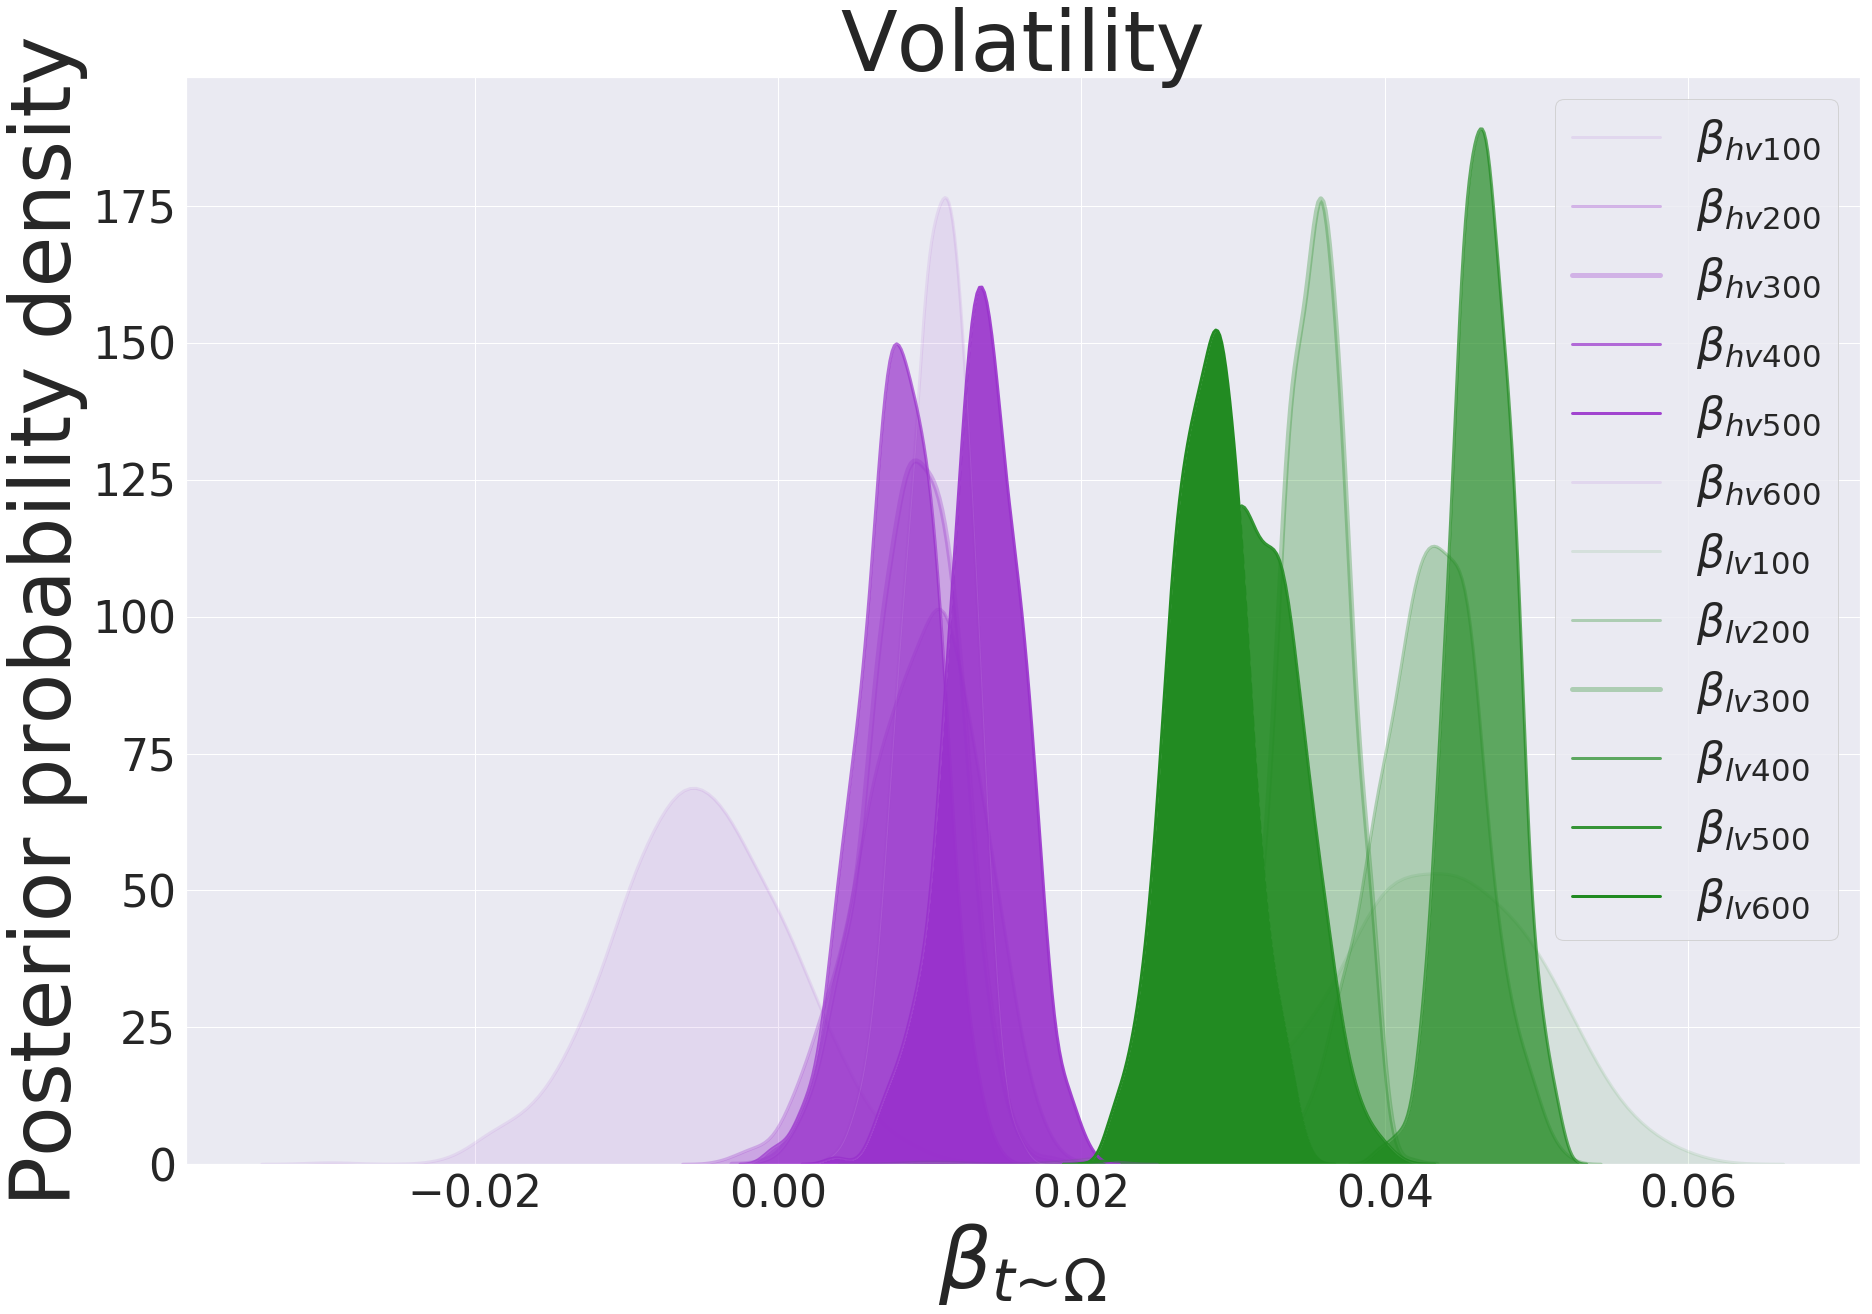

In [265]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hv_t100.trace(), label=r'$\beta_{hv100}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                  'alpha': 0.1})
sns.distplot(t_hv_t200.trace(), label=r'$\beta_{hv200}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha': 0.3
                                                                                               })
sns.distplot(t_hv_t300.trace(), label=r'$\beta_{hv300}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 
                                                                                                'linewidth': 5, 'alpha': 0.3})
sns.distplot(t_hv_t400.trace(), label=r'$\beta_{hv400}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha':0.7})
sns.distplot(t_hv_t500.trace(), label=r'$\beta_{hv500}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                'alpha':0.9})
sns.distplot(t_hv_t600.trace(), label=r'$\beta_{hv600}$', hist=False,rug=False,color='darkorchid', kde_kws = {'shade': True,
                                                                                                    'linewidth': 3, 'alpha': 0.1})



sns.distplot(t_lv_t100.trace(), label=r'$\beta_{lv100}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 
                                                                                                     'linewidth': 3, 'alpha': 0.1})
sns.distplot(t_lv_t200.trace(), label=r'$\beta_{lv200}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha': 0.3})
sns.distplot(t_lv_t300.trace(), label=r'$\beta_{lv300}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 
                                                                                            'linewidth': 5, 'alpha': 0.3})
sns.distplot(t_lv_t400.trace(), label=r'$\beta_{lv400}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha':0.7})
sns.distplot(t_lv_t500.trace(), label=r'$\beta_{lv500}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                            'alpha':0.9})
sns.distplot(t_lv_t600.trace(), label=r'$\beta_{lv600}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                 'alpha': 1})

# sns.distplot(t_lv.trace(), label=r'$\beta_{lv}$', hist=False,rug=False,color='forestgreen', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Volatility', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
# plt.xlim([-0.05,0.05])
# plt.savefig('tCPP_betas_conflict_OBS_acc.png', dpi=600)

# plt.savefig('tCPP_posterior_trials_vol.pdf')
plt.savefig('tCPP_posterior_trials_vol.jpeg', bbox='tight')


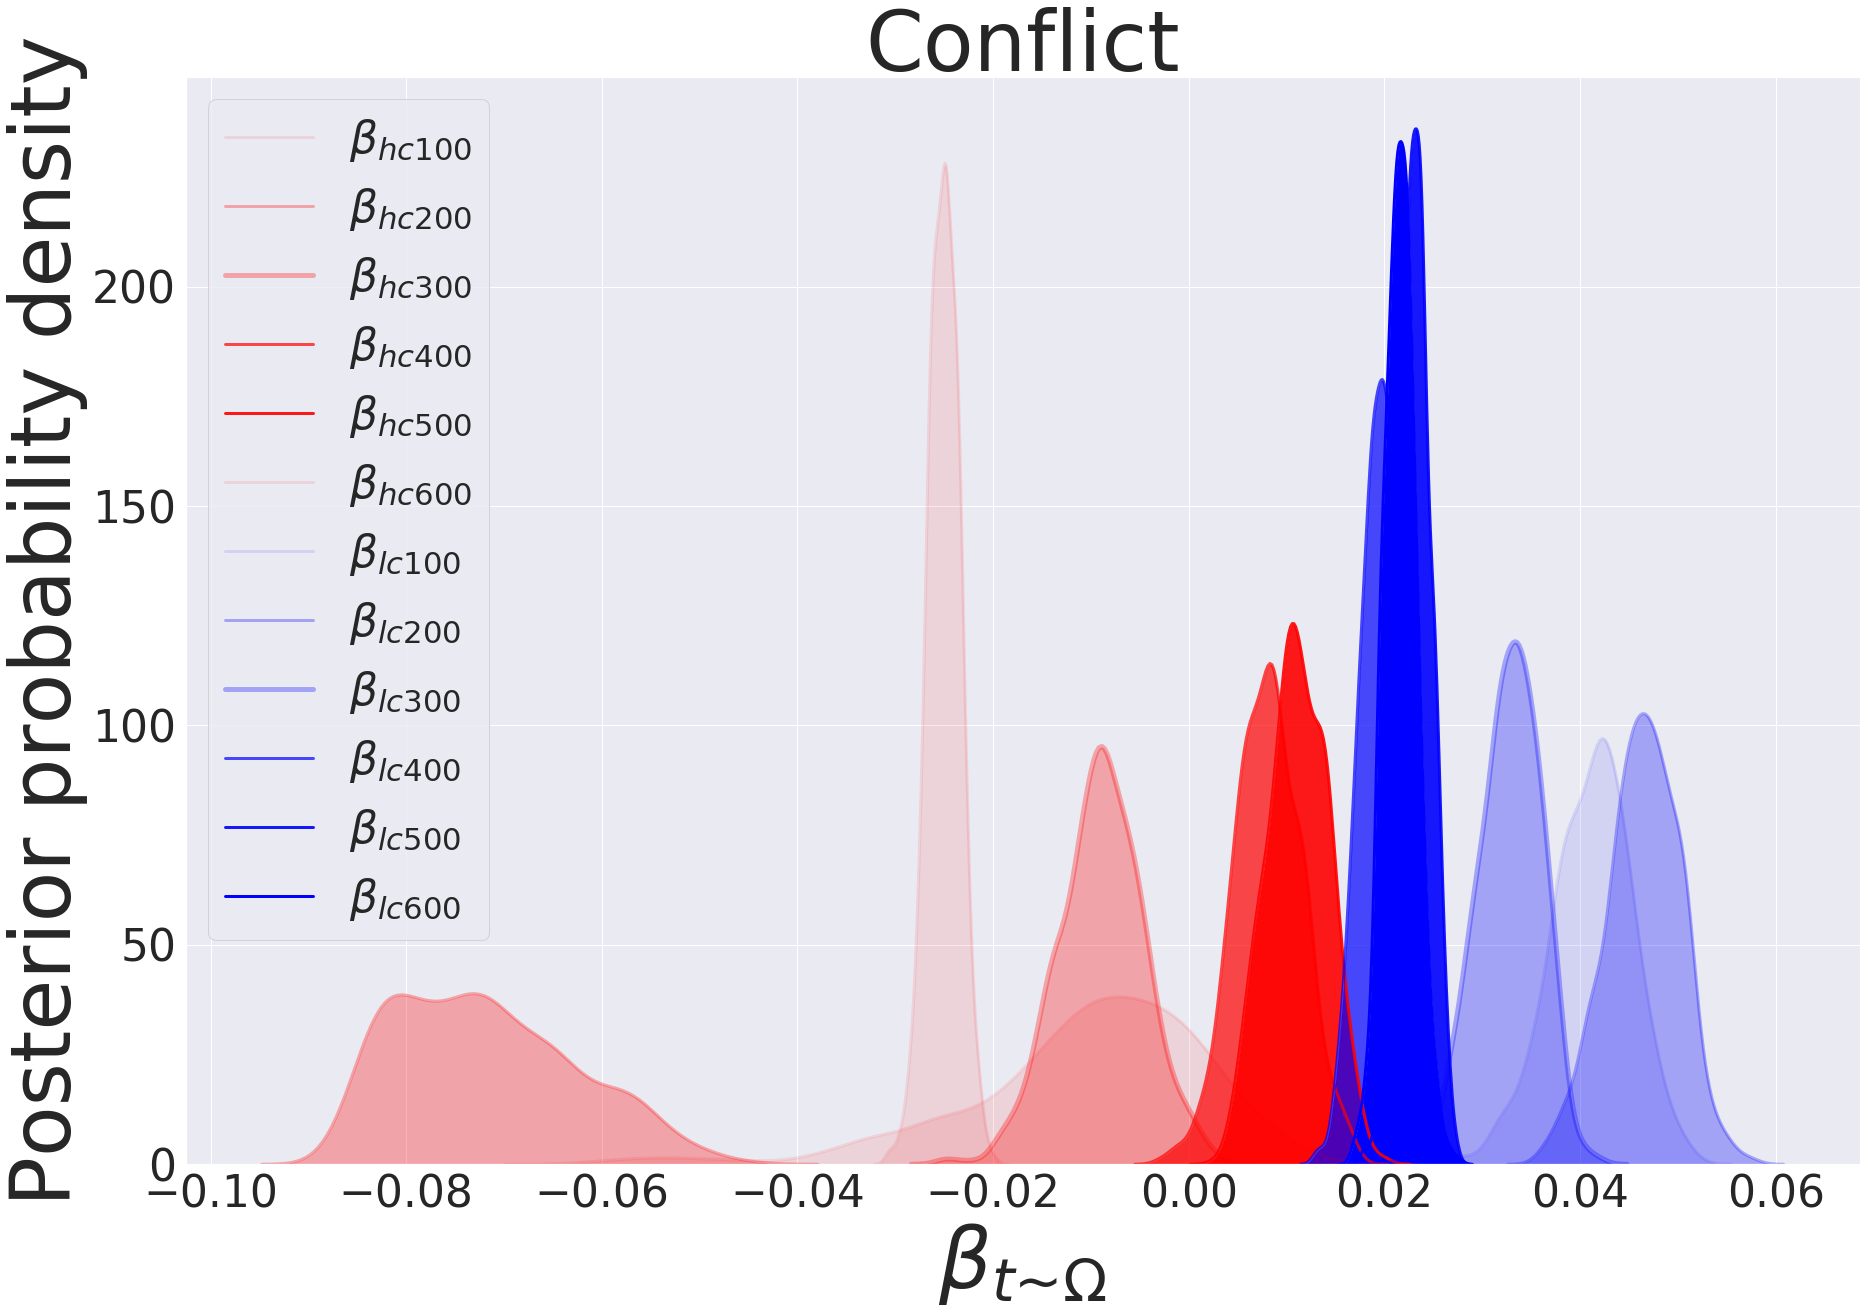

In [266]:
sns.set(font_scale=4)  # crazy big
plt.figure(figsize=(30,20))
sns.distplot(t_hc_t100.trace(), label=r'$\beta_{hc100}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                  'alpha': 0.1})
sns.distplot(t_hc_t200.trace(), label=r'$\beta_{hc200}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha': 0.3
                                                                                               })
sns.distplot(t_hc_t300.trace(), label=r'$\beta_{hc300}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 
                                                                                                'linewidth': 5, 'alpha': 0.3})
sns.distplot(t_hc_t400.trace(), label=r'$\beta_{hc400}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                'alpha':0.7})
sns.distplot(t_hc_t500.trace(), label=r'$\beta_{hc500}$', hist=False,rug=False,color='red', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                                'alpha':0.9})
sns.distplot(t_hc_t600.trace(), label=r'$\beta_{hc600}$', hist=False,rug=False,color='red', kde_kws = {'shade': True,
                                                                                                    'linewidth': 3, 'alpha': 0.1})



sns.distplot(t_lc_t100.trace(), label=r'$\beta_{lc100}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 
                                                                                                     'linewidth': 3, 'alpha': 0.1})
sns.distplot(t_lc_t200.trace(), label=r'$\beta_{lc200}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha': 0.3})
sns.distplot(t_lc_t300.trace(), label=r'$\beta_{lc300}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 
                                                                                            'linewidth': 5, 'alpha': 0.3})
sns.distplot(t_lc_t400.trace(), label=r'$\beta_{lc400}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                            'alpha':0.7})
sns.distplot(t_lc_t500.trace(), label=r'$\beta_{lc500}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3, 
                                                                                            'alpha':0.9})
sns.distplot(t_lc_t600.trace(), label=r'$\beta_{lc600}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3,
                                                                                                 'alpha': 1})

# sns.distplot(t_lc.trace(), label=r'$\beta_{lc}$', hist=False,rug=False,color='blue', kde_kws = {'shade': True, 'linewidth': 3})
plt.title('Conflict', fontsize='xx-large')
plt.ylabel('Posterior probability density', fontsize='xx-large')
plt.xlabel(r'$\beta_{t\textasciitilde \Omega}$',fontsize='xx-large')
# plt.xlim([-0.05,0.05])
# plt.savefig('tCPP_posterior_trials_conflict.pdf')
plt.savefig('tCPP_posterior_trials_conflict.jpeg', bbox='tight')


In [160]:
t0_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_Intercept'], 'mean'][0]
t_beta_hc_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hc]'], 'mean'][0]
t_beta_lc_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lc]'], 'mean'][0]
t_beta_hv_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[hv]'], 'mean'][0]
t_beta_lv_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['t_cpp:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [159]:
v0_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t100 = t_cpp_v_B_obs_reg_t100.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [185]:
v0_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [187]:
v0_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [188]:
v0_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [189]:
v0_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [190]:
v0_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [191]:
t100_v_hc = np.mean(v0_t100 + v_beta_hc_t100 * t100[t100.condition=='hc']['B'] )
t100_v_hv = np.mean(v0_t100 + v_beta_hv_t100 * t100[t100.condition=='hv']['B'] )

t100_v_lv = np.mean(v0_t100 + v_beta_lv_t100 * t100[t100.condition=='lv']['B'] )
t100_v_lc = np.mean(v0_t100 + v_beta_lc_t100 * t100[t100.condition=='lc']['B'] )

In [192]:
t200_v_hc = np.mean(v0_t200 + v_beta_hc_t200 * t200[t200.condition=='hc']['B'] )
t200_v_hv = np.mean(v0_t200 + v_beta_hv_t200 * t200[t200.condition=='hv']['B'] )

t200_v_lv = np.mean(v0_t200 + v_beta_lv_t200 * t200[t200.condition=='lv']['B'] )
t200_v_lc = np.mean(v0_t200 + v_beta_lc_t200 * t200[t200.condition=='lc']['B'] )

In [193]:
t300_v_hc = np.mean(v0_t300 + v_beta_hc_t300 * t300[t300.condition=='hc']['B'] )
t300_v_hv = np.mean(v0_t300 + v_beta_hv_t300 * t300[t300.condition=='hv']['B'] )

t300_v_lv = np.mean(v0_t300 + v_beta_lv_t300 * t300[t300.condition=='lv']['B'] )
t300_v_lc = np.mean(v0_t300 + v_beta_lc_t300 * t300[t300.condition=='lc']['B'] )

In [194]:
t400_v_hc = np.mean(v0_t400 + v_beta_hc_t400 * t400[t400.condition=='hc']['B'] )
t400_v_hv = np.mean(v0_t400 + v_beta_hv_t400 * t400[t400.condition=='hv']['B'] )

t400_v_lv = np.mean(v0_t400 + v_beta_lv_t400 * t400[t400.condition=='lv']['B'] )
t400_v_lc = np.mean(v0_t400 + v_beta_lc_t400 * t400[t400.condition=='lc']['B'] )

In [195]:
t500_v_hc = np.mean(v0_t500 + v_beta_hc_t500 * t500[t500.condition=='hc']['B'] )
t500_v_hv = np.mean(v0_t500 + v_beta_hv_t500 * t500[t500.condition=='hv']['B'] )

t500_v_lv = np.mean(v0_t500 + v_beta_lv_t500 * t500[t500.condition=='lv']['B'] )
t500_v_lc = np.mean(v0_t500 + v_beta_lc_t500 * t500[t500.condition=='lc']['B'] )

In [196]:
t600_v_hc = np.mean(v0_t600 + v_beta_hc_t600 * t600[t600.condition=='hc']['B'] )
t600_v_hv = np.mean(v0_t600 + v_beta_hv_t600 * t600[t600.condition=='hv']['B'] )

t600_v_lv = np.mean(v0_t600 + v_beta_lv_t600 * t600[t600.condition=='lv']['B'] )
t600_v_lc = np.mean(v0_t600 + v_beta_lc_t600 * t600[t600.condition=='lc']['B'] )

In [216]:
v_hc = np.array([t100_v_hc, t200_v_hc,t300_v_hc, t400_v_hc,t500_v_hc, t600_v_hc])
v_lc = np.array([t100_v_lc, t200_v_lc,t300_v_lc, t400_v_lc,t500_v_lc, t600_v_lc])
v_hv = np.array([t100_v_hv, t200_v_hv,t300_v_hv, t400_v_hv,t500_v_hv, t600_v_hv])
v_lv = np.array([t100_v_lv, t200_v_lv,t300_v_lv, t400_v_lv,t500_v_lv, t600_v_lv])

In [217]:
v_hc_err = np.square(v_hc[-1] - v_hc)
v_lc_err = np.square(v_lc[-1] - v_lc)
v_hv_err = np.square(v_hv[-1] - v_hv)
v_lv_err = np.square(v_lv[-1] - v_lv)

Text(0,0.5,'')

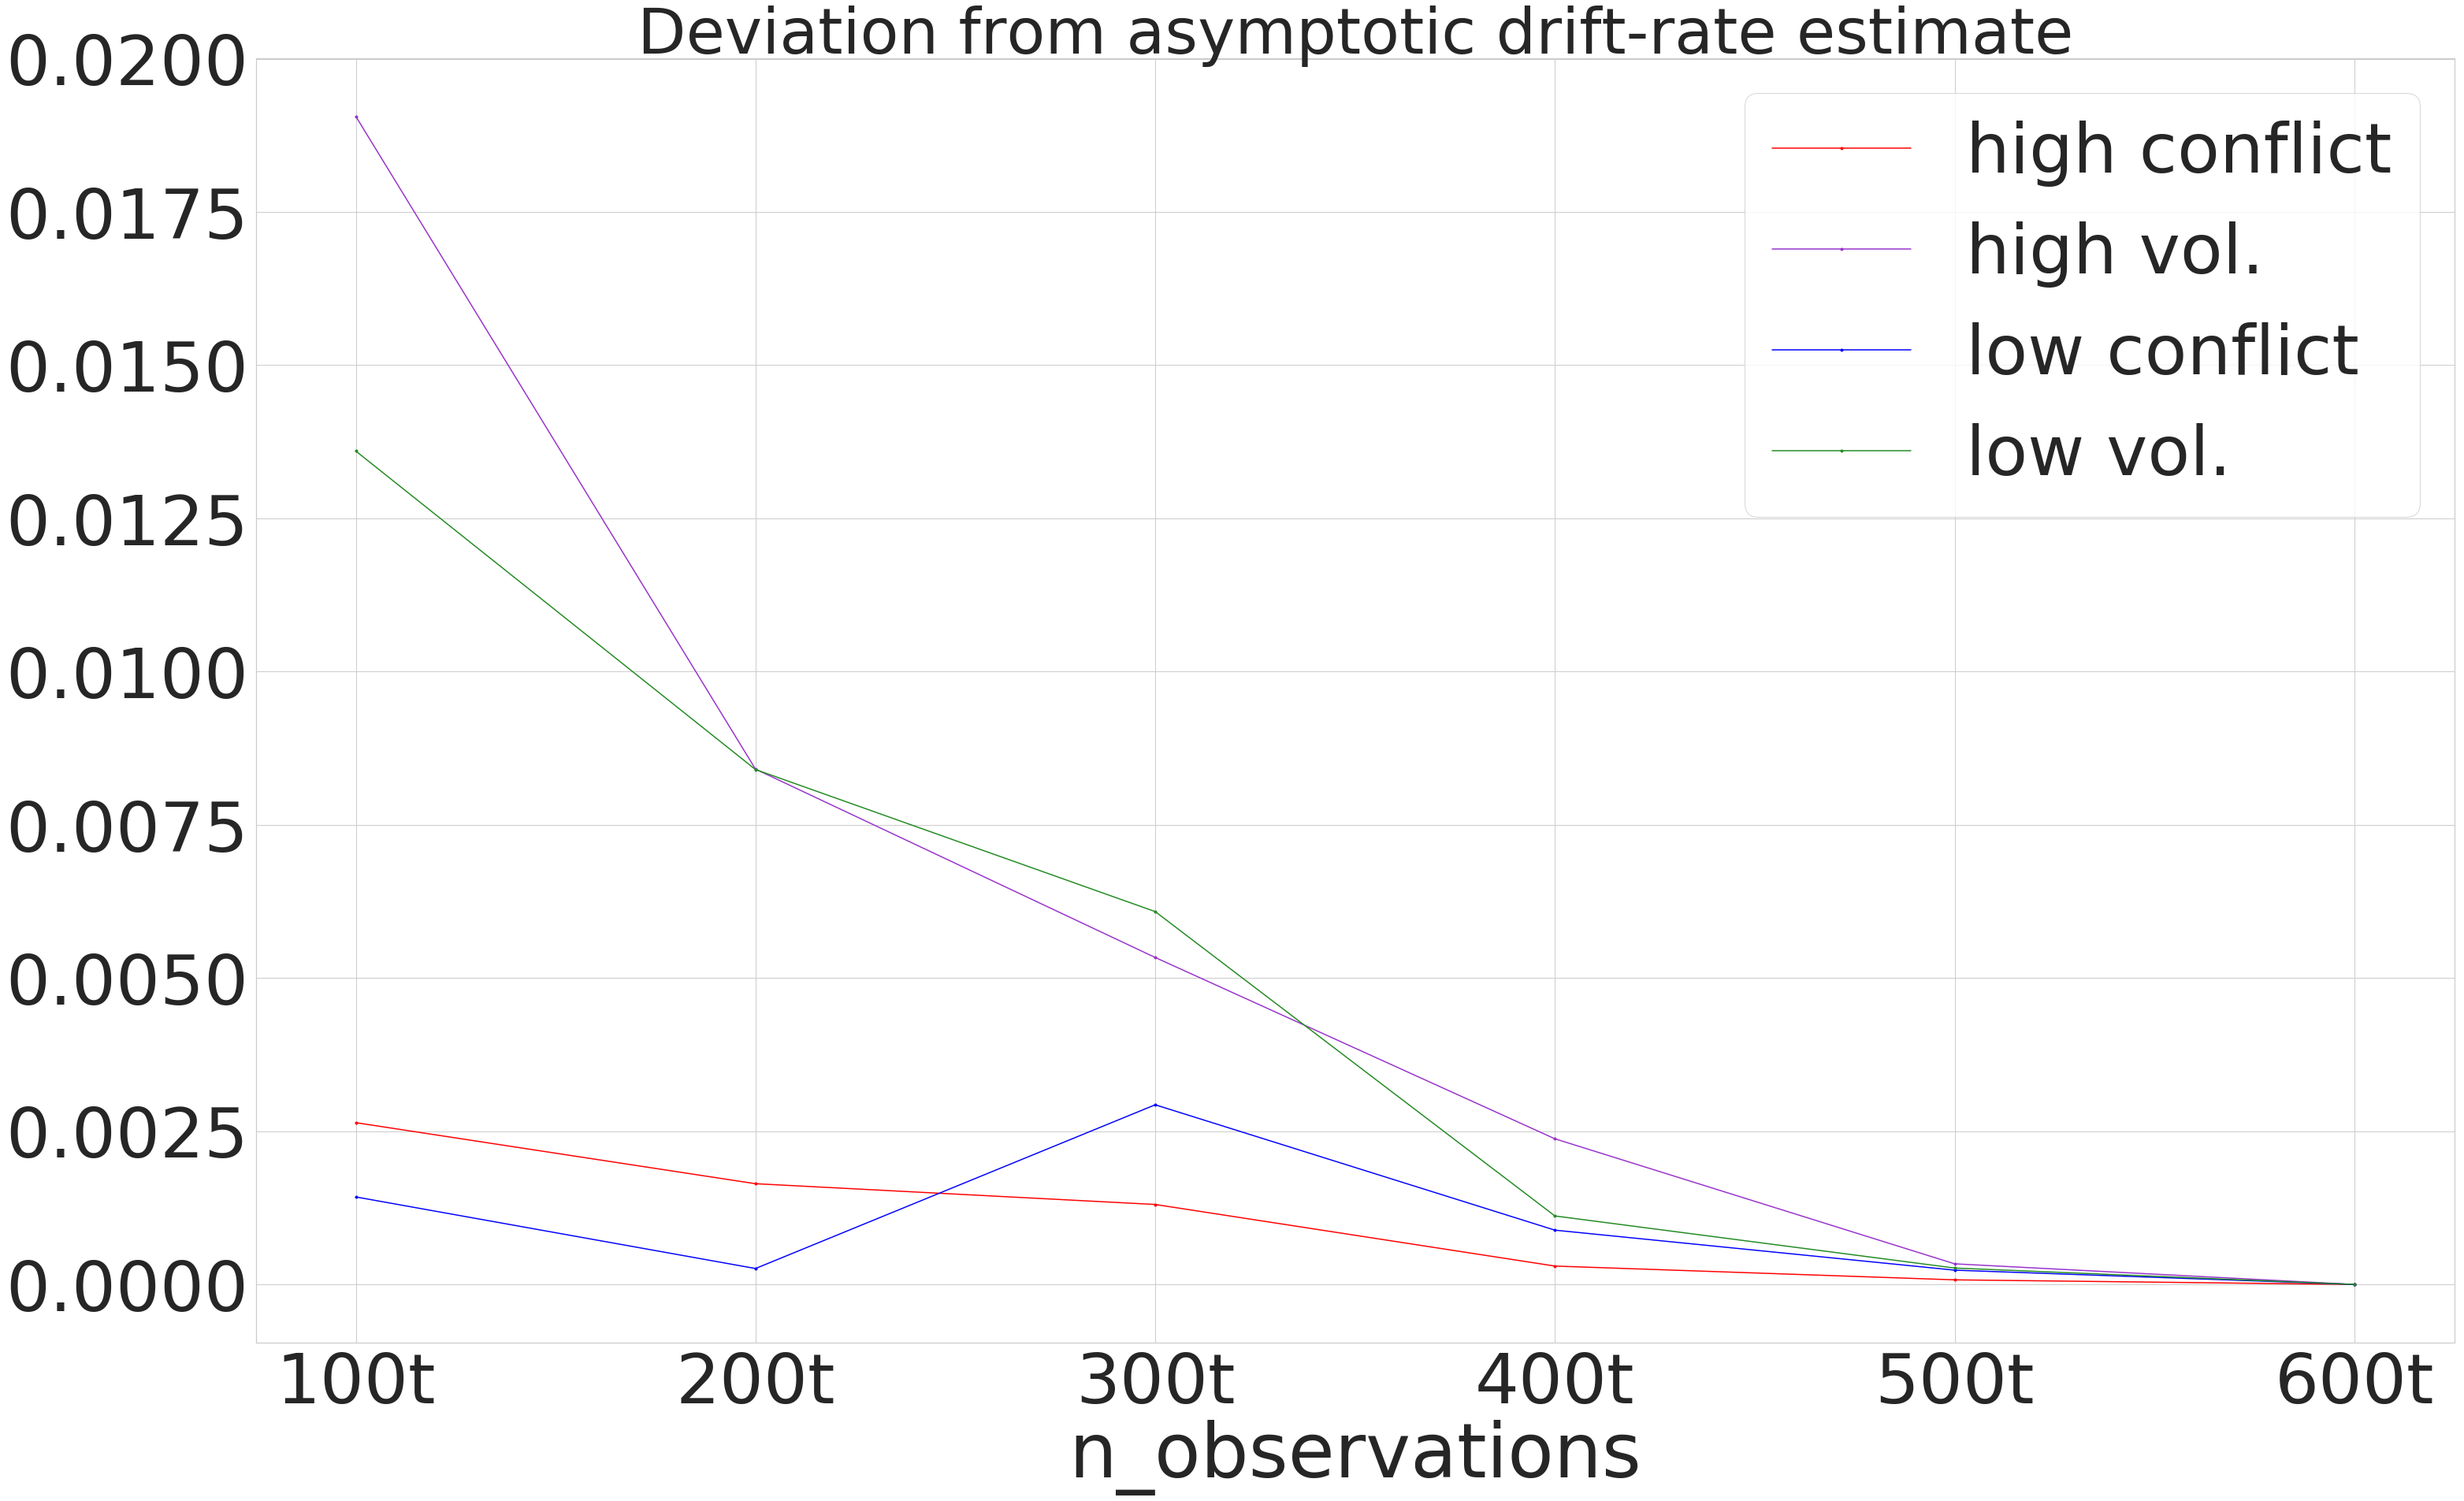

In [219]:
sns.set(font_scale=8)  
sns.set_style("whitegrid")

plt.figure(figsize=(50,30))
plt.plot(m_names, v_hc_err, '.-', color='red',label='high conflict')
plt.plot(m_names, v_lc_err, '.-',  color='darkorchid',label='high vol.')
plt.plot(m_names, v_hv_err, '.-',color='blue', label='low conflict')
plt.plot(m_names, v_lv_err, '.-', color='forestgreen', label='low vol.')
plt.legend()

plt.title("Deviation from asymptotic drift-rate estimate", fontsize='small')
plt.xlabel('n_observations')
plt.ylabel(r'')
# plt.ylim([0,.01])

In [185]:
v0_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t200 = t_cpp_v_B_obs_reg_t200.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [187]:
v0_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t300 = t_cpp_v_B_obs_reg_t300.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [188]:
v0_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t400 = t_cpp_v_B_obs_reg_t400.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [189]:
v0_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t500 = t_cpp_v_B_obs_reg_t500.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [190]:
v0_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_Intercept'], 'mean'][0]
v_beta_hc_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hc]'], 'mean'][0]
v_beta_lc_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lc]'], 'mean'][0]
v_beta_hv_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[hv]'], 'mean'][0]
v_beta_lv_t600 = t_cpp_v_B_obs_reg_t600.nodes_db.ix[['v_B:C(condition)[lv]'], 'mean'][0]

/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/krista/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel pac

In [191]:
t100_v_hc = np.mean(v0_t100 + v_beta_hc_t100 * t100[t100.condition=='hc']['B'] )
t100_v_hv = np.mean(v0_t100 + v_beta_hv_t100 * t100[t100.condition=='hv']['B'] )

t100_v_lv = np.mean(v0_t100 + v_beta_lv_t100 * t100[t100.condition=='lv']['B'] )
t100_v_lc = np.mean(v0_t100 + v_beta_lc_t100 * t100[t100.condition=='lc']['B'] )

In [192]:
t200_v_hc = np.mean(v0_t200 + v_beta_hc_t200 * t200[t200.condition=='hc']['B'] )
t200_v_hv = np.mean(v0_t200 + v_beta_hv_t200 * t200[t200.condition=='hv']['B'] )

t200_v_lv = np.mean(v0_t200 + v_beta_lv_t200 * t200[t200.condition=='lv']['B'] )
t200_v_lc = np.mean(v0_t200 + v_beta_lc_t200 * t200[t200.condition=='lc']['B'] )

In [193]:
t300_v_hc = np.mean(v0_t300 + v_beta_hc_t300 * t300[t300.condition=='hc']['B'] )
t300_v_hv = np.mean(v0_t300 + v_beta_hv_t300 * t300[t300.condition=='hv']['B'] )

t300_v_lv = np.mean(v0_t300 + v_beta_lv_t300 * t300[t300.condition=='lv']['B'] )
t300_v_lc = np.mean(v0_t300 + v_beta_lc_t300 * t300[t300.condition=='lc']['B'] )

In [194]:
t400_v_hc = np.mean(v0_t400 + v_beta_hc_t400 * t400[t400.condition=='hc']['B'] )
t400_v_hv = np.mean(v0_t400 + v_beta_hv_t400 * t400[t400.condition=='hv']['B'] )

t400_v_lv = np.mean(v0_t400 + v_beta_lv_t400 * t400[t400.condition=='lv']['B'] )
t400_v_lc = np.mean(v0_t400 + v_beta_lc_t400 * t400[t400.condition=='lc']['B'] )

In [195]:
t500_v_hc = np.mean(v0_t500 + v_beta_hc_t500 * t500[t500.condition=='hc']['B'] )
t500_v_hv = np.mean(v0_t500 + v_beta_hv_t500 * t500[t500.condition=='hv']['B'] )

t500_v_lv = np.mean(v0_t500 + v_beta_lv_t500 * t500[t500.condition=='lv']['B'] )
t500_v_lc = np.mean(v0_t500 + v_beta_lc_t500 * t500[t500.condition=='lc']['B'] )

In [196]:
t600_v_hc = np.mean(v0_t600 + v_beta_hc_t600 * t600[t600.condition=='hc']['B'] )
t600_v_hv = np.mean(v0_t600 + v_beta_hv_t600 * t600[t600.condition=='hv']['B'] )

t600_v_lv = np.mean(v0_t600 + v_beta_lv_t600 * t600[t600.condition=='lv']['B'] )
t600_v_lc = np.mean(v0_t600 + v_beta_lc_t600 * t600[t600.condition=='lc']['B'] )